In [ ]:
!git clone https://github.com/hhadzicc/zadaca2.git

Cloning into 'zadaca2'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), 24.23 KiB | 1.86 MiB/s, done.


In [ ]:
#importovanje biblioteka
import plotly
import random
import matplotlib
import statistics
import numpy as np
import pandas as pd
import plotly.express as px
import statsmodels.api as sm
import matplotlib.pyplot as plt
from IPython.display import HTML
from prettytable import PrettyTable
from sklearn.metrics import mean_squared_error
#import warnings
#warnings.filterwarnings("ignore")

In [ ]:
#podesavanje fonta
shell = get_ipython()

def adjust_font_size():
  display(HTML('''<style>
    body {
      font-size: 18px;
    }
  '''))

if adjust_font_size not in shell.events.callbacks['pre_execute']:
  shell.events.register('pre_execute', adjust_font_size)

# <font size="+3">**Import i osnovni prikaz**

<font size="+1" face="verdana" color="blue"> Prikazivanje  DataFrame-a </font>

In [ ]:
matrica = pd.read_csv('zadaca2/test.csv') #učitavanje podataka u matricu
matrica.head(5)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


<br><br>
<font size="+1" face="verdana" color="blue"> Prikazivanje osnovnih informacija o DataFrame-u </font>

In [ ]:
matrica.info()
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

<br><br>
<font size="+1" face="verdana" color="black">
ID: Jedinstveni identifikator telefona<br>
battery_power: Ukupna energija koju baterija može pohraniti u jednom trenutku, izražena u miliamper-satima (mAh)<br>
blue: Ima li telefon mogućnost Bluetooth-a (1 - Da, 0 - Ne)<br>
clock_speed: Brzina izvršavanja instrukcija mikroprocesora<br>
dual_sim: Ima li telefon podršku za dvije SIM kartice (1 - Da, 0 - Ne)<br>
fc: Megapiksela prednje kamere (Front Camera)<br>
four_g: Ima li telefon podršku za 4G mrežu (1 - Da, 0 - Ne)<br>
int_memory: Interna memorija telefona u gigabajtima<br>
m_dep: Debljina mobilnog uređaja u centimetrima<br>
mobile_wt: Težina mobilnog telefona<br>
n_cores: Broj jezgri procesora<br>
pc: Megapiksela primarne kamere (Primary Camera)<br>
px_height: Visina piksela rezolucije ekrana<br>
px_width: Širina piksela rezolucije ekrana<br>
ram: Radna memorija (Random Access Memory) u megabajtima<br>
sc_h: Visina zaslona mobilnog telefona u centimetrima<br>
sc_w: Širina zaslona mobilnog telefona u centimetrima<br>
talk_time: Najduže trajanje razgovora koje jedno punjenje baterije može pružiti<br>
three_g: Ima li telefon podršku za 3G mrežu (1 - Da, 0 - Ne)<br>
touch_screen: Ima li telefon dodirni zaslon (1 - Da, 0 - Ne)<br>
wifi: Ima li telefon mogućnost Wi-Fi povezivanja (1 - Da, 0 - Ne)<br>
</font><br><br>

# <font size="+3">**Analiza seta podataka**


  </br>
 <font size="+3" face="verdana" color="red">Prikazivanje  osnovnih informacija za numericke varijable </font>


 </br><font size="+2" face="verdana" color="blue"> BATTERY POWER </font>

In [ ]:
print(matrica['battery_power'].describe())
print("\n")

df = pd.DataFrame({'Snaga baterije (mAh)': matrica['battery_power']})
fig = px.box(df,   y='Snaga baterije (mAh)', points='all')
fig.update_layout(width=830, height=600)
fig.update_traces(boxpoints='all', jitter=1)
fig.show()

count    1000.000000
mean     1248.510000
std       432.458227
min       500.000000
25%       895.000000
50%      1246.500000
75%      1629.250000
max      1999.000000
Name: battery_power, dtype: float64





<font size="+0" face="verdana" color="black">**ZAKLJUČAK**</font>

<font size="+0" face="verdana" color="black">
Možemo zaključiti da se većina mobilnih telefona u skupu podataka kreće u rasponu između 895 mAh i 1629.25 mAh. Prosječna vrijednost snage baterije je 1248.51 mAh. Box plot grafikon nam pokazuje da distribucija snage baterije ima simetričan oblik i da nema ekstremno visokih ili niskih vrijednosti.
</font>
<br>

<br><br>
<font size="+2" face="verdana" color="blue"> RAM MEMORIJA </font> <br>

In [ ]:
print(matrica['ram'].describe())
print("\n")

df = pd.DataFrame({'RAM (MB)': matrica['ram']})
fig = px.box(df,   y='RAM (MB)', points='all')
fig.update_layout(width=830, height=600)
fig.update_traces(boxpoints='all', jitter=1)
fig.show()

count    1000.000000
mean     2138.998000
std      1088.092278
min       263.000000
25%      1237.250000
50%      2153.500000
75%      3065.500000
max      3989.000000
Name: ram, dtype: float64




<font size="+0" face="verdana" color="black">**ZAKLJUČAK**</font>

<font size="+0" face="verdana" color="black">
Prosječna vrijednost RAM-a iznosi 2139 MB. Minimalna vrijednost RAM-a je 263 MB, dok je maksimalna vrijednost 3989 MB. Standardna devijacija je prilicno visoka i iznosi 1088. Visoka standardna devijacija nam ukazuje na to da postoje značajne razlike u količini RAM-a između različitih telefona u ovom skupu podataka.
</font>
<br>

<br><br>
<font size="+2" face="verdana" color="blue"> BRZINA CPU (GHz)</font>

In [ ]:
print(matrica['clock_speed'].describe())
print("\n")

df = pd.DataFrame({'BRZINA CPU(GHz)': matrica['clock_speed']})
fig = px.box(df,   y='BRZINA CPU(GHz)', points='all')
fig.update_layout(width=830, height=600)
fig.update_traces(boxpoints='all', jitter=1)
fig.show()

count    1000.000000
mean        1.540900
std         0.829268
min         0.500000
25%         0.700000
50%         1.500000
75%         2.300000
max         3.000000
Name: clock_speed, dtype: float64




<font size="+0" face="verdana" color="black">**ZAKLJUČAK**</font>

<font size="+0" face="verdana" color="black">
 Raspodjela brzine procesora je relativno uravnotežena, s većinom telefona koji se nalaze u srednjem rasponu brzine. Dakle, razlika između maksimalne vrijednosti (max) i gornjeg kvartila (Q3) je veća nego razlika između donjeg kvartila (Q1) i minimalne vrijednosti (min). To ukazuje na prisutnost ekstremnih vrijednosti iznad gornjeg kvartila, što znači da postoji mali broj telefona s vrlo visokom brzinom procesora. Odnosno većina telefona se nalazi unutar raspona od Q1 do Q3, dok su iznad Q3 prisutni samo rijetki telefoni s vrlo visokom brzinom procesora.
</font>
<br>

<br><br>
<font size="+2" face="verdana" color="blue"> PREDNJA KAMERA(MP) </font>

In [ ]:
print(matrica['fc'].describe())
print("\n")

df = pd.DataFrame({'PREDNJA KAMERA(MP)': matrica['fc']})
fig = px.box(df,   y='PREDNJA KAMERA(MP)', points='all')
fig.update_layout(width=830, height=600)
fig.update_traces(boxpoints='all', jitter=1)
fig.show()

count    1000.000000
mean        4.593000
std         4.463325
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        19.000000
Name: fc, dtype: float64





<font size="+0" face="verdana" color="black">**ZAKLJUČAK**</font>

<font size="+0" face="verdana" color="black">
Iz dobijenih podataka možemo zaključiti da se rezolucija prednje kamere telefona kreće od 0 do 19 MP, s prosječnom vrijednošću od 4.59 MP. Primjećujemo da postoji znatna varijabilnost u rezoluciji prednje kamere.
Visoka standardna devijacija (4.46) ukazuje na širok raspon rezolucija prednje kamere. To znači da se u uzorku mogu naći telefoni s vrlo visokom rezolucijom prednje kamere, ali i oni s niskom rezolucijom. Možemo primijetiti da postoji nekoliko ekstremnih vrijednosti iznad Q3. To znači postoji nekoliko telefona s vrlo visokom rezolucijom prednje kamere.
</font>
<br>

<br><br>
<font size="+2" face="verdana" color="blue"> ZADNJA KAMERA(MP) </font>

In [ ]:
print(matrica['pc'].describe())
print("\n")

df = pd.DataFrame({'ZADNJA KAMERA(MP)': matrica['pc']})
fig = px.box(df,   y='ZADNJA KAMERA(MP)', points='all')
fig.update_layout(width=830, height=600)
fig.update_traces(boxpoints='all', jitter=1)
fig.show()

count    1000.000000
mean       10.054000
std         6.095099
min         0.000000
25%         5.000000
50%        10.000000
75%        16.000000
max        20.000000
Name: pc, dtype: float64




<font size="+0" face="verdana" color="black">**ZAKLJUČAK**</font>

<font size="+0" face="verdana" color="black">
Prosječna rezolucija zadnje kamere iznosi 10 MP. Standardna devijacija od 6.1 pokazuje da postoji raznolikost u rezolucijama zadnjih kamera među telefonima. To znači da se neki telefoni ističu s visokom rezolucijom, dok drugi imaju nižu rezoluciju. **KAO I U PRETHODNOM SLUČAJU** imamo minimalnu rezoluciju 0 sto znaći da neki telefoni nemaju kameru što bi mogla biti i dodatna kategorijska varijabla.
</font>
<br>

<br><br>
<font size="+2" face="verdana" color="blue"> TEZINA TELEFONA(grami) </font>

In [ ]:
print(matrica['mobile_wt'].describe())
print("\n")

df = pd.DataFrame({'TEZINA(g)': matrica['mobile_wt']})
fig = px.box(df,   y='TEZINA(g)', points='all')
fig.update_layout(width=830, height=600)
fig.update_traces(boxpoints='all', jitter=1)
fig.show()

count    1000.00000
mean      139.51100
std        34.85155
min        80.00000
25%       109.75000
50%       139.00000
75%       170.00000
max       200.00000
Name: mobile_wt, dtype: float64




<font size="+0" face="verdana" color="black">**ZAKLJUČAK**</font>

<font size="+0" face="verdana" color="black">
Minimalna vrijednost od 80 grama govori o nekoliko vrlo laganih telefona u uzorku. To su vjerojatno telefoni manje veličine ili oni koji koriste lagane materijale u izradi.Maksimalna vrijednost od 200 grama ukazuje na postojanje nekoliko telefona koji su relativno teški. To su vjerojatno telefoni veće izdržljivosti ili baterijskog kapaciteta.
</font>
<br>

 </br></br></br>
 <font size="+3" face="verdana" color="red">Prikazivanje  osnovnih informacija za kategorijske varijable </font>

 </br><font size="+2" face="verdana" color="blue"> PIE CHARTOVI </font>

In [ ]:
df_blue = pd.DataFrame({'blue': matrica['blue'].value_counts()})
df_dual_sim = pd.DataFrame({'dual_sim': matrica['dual_sim'].value_counts()})
df_four_g = pd.DataFrame({'four_g': matrica['four_g'].value_counts()})
df_three_g = pd.DataFrame({'three_g': matrica['three_g'].value_counts()})
df_touch_screen = pd.DataFrame({'touch_screen': matrica['touch_screen'].value_counts()})
df_wifi = pd.DataFrame({'wifi': matrica['wifi'].value_counts()})

# Izrada interaktivnih pie chartova
fig = px.pie(df_blue, values='blue', names=df_blue.index, title='Prisutnost Bluetooth funkcionalnosti')
fig.update_layout(width=600, height=400)

fig_dual_sim = px.pie(df_dual_sim, values='dual_sim', names=df_dual_sim.index, title='Prisutnost Dual SIM podrške')
fig_dual_sim.update_layout(width=600, height=400)

fig_four_g = px.pie(df_four_g, values='four_g', names=df_four_g.index, title='Prisutnost 4G funkcionalnosti')
fig_four_g.update_layout(width=600, height=400)

fig_three_g = px.pie(df_three_g, values='three_g', names=df_three_g.index, title='Prisutnost 3G funkcionalnosti')
fig_three_g.update_layout(width=600, height=400)

fig_touch_screen = px.pie(df_touch_screen, values='touch_screen', names=df_touch_screen.index, title='Prisutnost Touch Screen funkcionalnosti')
fig_touch_screen.update_layout(width=600, height=400)

fig_wifi = px.pie(df_wifi, values='wifi', names=df_wifi.index, title='Prisutnost WiFi funkcionalnosti')
fig_wifi.update_layout(width=600, height=400)

# Prikazivanje pie chartova
fig.show()
fig_dual_sim.show()
fig_four_g.show()
fig_three_g.show()
fig_touch_screen.show()
fig_wifi.show()


 </br><font size="+2" face="verdana" color="blue"> Pravimo dvije nove kolone za kategorijske varijable "ima_prednju_kameru" i "ima_zadnju_kameru" koje izvodimo iz kolona "pc"(zadnja kamera) i "fc"(prednja kamera). U slucaju kada je broj MP kamere 0 imamo 0 u suprotnom 1.</font>

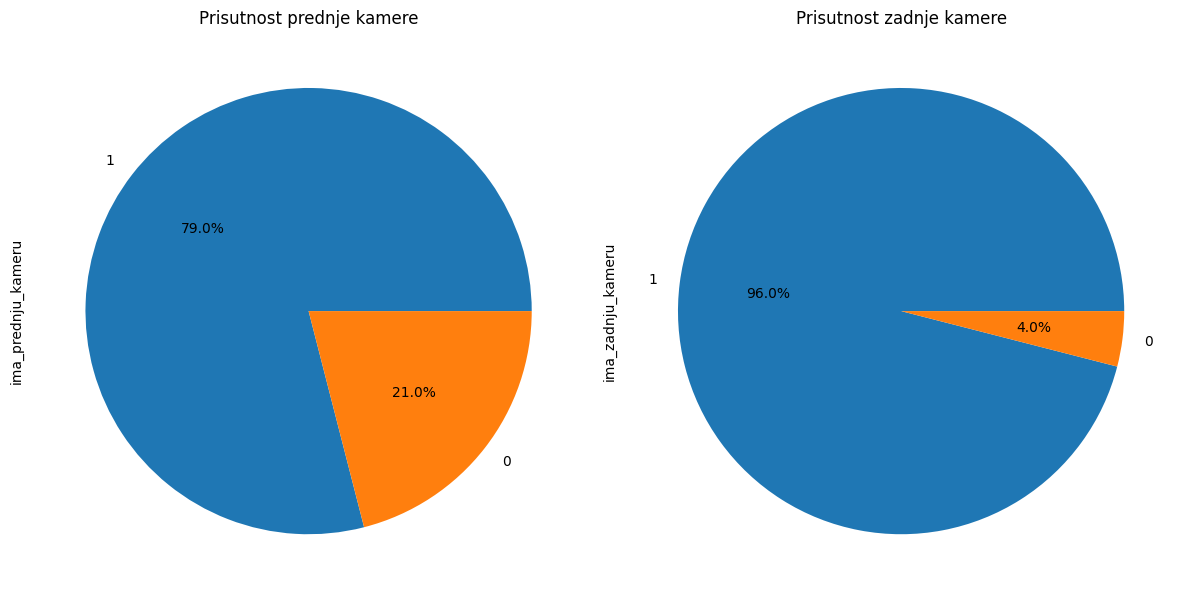

In [ ]:
# Generisanje nove varijable "ima_prednju_kameru"
matrica['ima_prednju_kameru'] = matrica['fc'].apply(lambda x: 1 if x > 0 else 0)

# Generisanje nove varijable "ima_zadnju_kameru"
matrica['ima_zadnju_kameru'] = matrica['pc'].apply(lambda x: 1 if x > 0 else 0)

# Pie chartovi za nove varijable
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
matrica['ima_prednju_kameru'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Prisutnost prednje kamere')

plt.subplot(1, 2, 2)
matrica['ima_zadnju_kameru'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Prisutnost zadnje kamere')

plt.tight_layout()
plt.show()


 </br></br></br>
 <font size="+3" face="verdana" color="red">Prikazivanje  veza između numeričkih varijabli(scatter plotovi)</font>

In [ ]:
fig4 = px.scatter(matrica, x='px_width', y='px_height', title='Odnos širine i visine piksela')
fig4.update_traces(marker=dict(size=8, opacity=0.5))

fig4.show()

In [ ]:
#code za 91 scatter plot (CPU IN FIRE)
"""
import plotly.express as px

numeric_variables = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores',
                     'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

for i in range(len(numeric_variables) - 1):
    for j in range(i + 1, len(numeric_variables)):
        var1 = numeric_variables[i]
        var2 = numeric_variables[j]

        scatter_plot = px.scatter(matrica, x=matrica[var1], y=matrica[var2],
                                  title=f'Odnos između {var1} i {var2}')
        scatter_plot.update_layout(xaxis_title=var1, yaxis_title=var2)
        scatter_plot.show()
        print("\n---\n")
"""
print("\n")

 </br><font size="+2" face="verdana" color="blue"> Reprezentativni scatter plotovi</font>

In [ ]:
fig1 = px.scatter(matrica, x='px_height', y='px_width', title='Odnos između visine i širine ekrana')

fig2 = px.scatter(matrica, x='px_height', y='ram', title='Odnos između visine ekrana i radne memorije')

fig3 = px.scatter(matrica, x='battery_power', y='fc', title='Odnos između baterijske snage i prednje kamere')

fig4 = px.scatter(matrica, x='battery_power', y='px_height', title='Odnos između baterijske snage i visine ekrana')

fig5 = px.scatter(matrica, x='fc', y='pc', title='Odnos između prednje i zadnje kamere')

fig6 = px.scatter(matrica, x='int_memory', y='px_height', title='Odnos između interne memorije i visine ekrana')

fig7 = px.scatter(matrica, x='int_memory', y='sc_w', title='Odnos između interne memorije i širine ekrana')

fig8 = px.scatter(matrica, x='mobile_wt', y='px_height', title='Odnos između težine telefona i visine ekrana')

fig9 = px.scatter(matrica, x='mobile_wt', y='sc_w', title='Odnos između težine telefona i širine ekrana')

fig10 = px.scatter(matrica, x='ram', y='sc_w', title='Odnos između radne memorije i širine ekrana')

fig11 = px.scatter(matrica, x='sc_h', y='sc_w', title='Odnos između visine i širine ekrana')

fig10.show()
fig9.show()
fig8.show()
fig7.show()
fig6.show()
fig5.show()
fig3.show()
fig11.show()
fig4.show()
fig2.show()
fig1.show()


# <font size="+3">**Chi-square test za ispitivanje nezavisnosti kategorijskih varijabli**

 Izvršit ćemo chi-square test za ispitivanje nezavisnosti između varijabli "three_g" i "four_g".

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Učitavanje podataka
data = pd.read_csv('https://raw.githubusercontent.com/hhadzicc/zadaca2/main/test.csv')

# Izdvajanje potrebnih varijabli
var1 = data['three_g']
var2 = data['four_g']

# Kreiranje kontingencijske tablice
contingency_table = pd.crosstab(var1, var2)

# Izvršavanje chi-square testa nezavisnosti
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Ispis rezultata
print("Rezultati chi-square testa:")
print("Chi-square vrijednost:", chi2)
print("P-vrijednost:", p_value)


Rezultati chi-square testa:
Chi-square vrijednost: 303.8205180679066
P-vrijednost: 4.846479722142162e-68


Dobiveni rezultati ukazuju na to da postoji vrlo jaka i statistički značajna veza između varijabli "three_g" i "four_g" u našoj bazi podataka.<br><br>
DODATNO OBJASNJENJE:
<br>
Nulta hipoteza (H0): Varijable su nezavisne.<br>
Alternativna hipoteza (H1): Varijable nisu nezavisne, postoji statistički značajna povezanost/zavisnost između njih.<br><br>
Kako smo dobili p-vrijednost približnu nuli, možemo odbaciti nultu hipotezu i zaključujemo da varijable nisu nezavisne, što opća logika potvrđuje jer nema mnogo razloga zašto telefon sa 4G ne bi imao 3G mogućnost.

Izvršit ćemo chi-square test za ispitivanje nezavisnosti između varijabli "blue" i "wifi".

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Učitavanje podataka
data = pd.read_csv('https://raw.githubusercontent.com/hhadzicc/zadaca2/main/test.csv')

# Izdvajanje potrebnih varijabli
var1 = data['blue']
var2 = data['wifi']

# Kreiranje kontingencijske tablice
contingency_table = pd.crosstab(var1, var2)

# Izvršavanje chi-square testa nezavisnosti
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Ispis rezultata
print("Rezultati chi-square testa:")
print("Chi-square vrijednost:", chi2)
print("P-vrijednost:", p_value)

Rezultati chi-square testa:
Chi-square vrijednost: 0.5553741489959615
P-vrijednost: 0.4561300960806892


Dobiveni rezultati ukazuju na to da ne postoji statistički značajna veza između varijabli "blue" i "wifi" u našoj bazi podataka.<br><br>
DODATNO OBJASNJENJE:
<br>
Nulta hipoteza (H0): Varijable su nezavisne.<br>
Alternativna hipoteza (H1): Varijable nisu nezavisne, postoji statistički značajna povezanost/zavisnost između njih.<br><br>
Kako smo dobili p-vrijednost je 0.4561300960806892, što je veće od 0.05-0.1 (5%-10%). To znači da nemamo dovoljno dokaza da odbacimo nultu hipotezu i zaključujemo da nema statistički značajne veze između varijabli "blue" i "wifi".

 Izvršit ćemo chi-square test za ispitivanje nezavisnosti između varijabli "dual_sim" i "touch_screen".

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Učitavanje podataka
data = pd.read_csv('https://raw.githubusercontent.com/hhadzicc/zadaca2/main/test.csv')

# Izdvajanje potrebnih varijabli
var1 = data['dual_sim']
var2 = data['touch_screen']

# Kreiranje kontingencijske tablice
contingency_table = pd.crosstab(var1, var2)

# Izvršavanje chi-square testa nezavisnosti
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Ispis rezultata
print("Rezultati chi-square testa:")
print("Chi-square vrijednost:", chi2)
print("P-vrijednost:", p_value)

Rezultati chi-square testa:
Chi-square vrijednost: 1.0251851139917745
P-vrijednost: 0.3112922349955505


Dobiveni rezultati ukazuju na to da ne postoji statistički značajna veza između varijabli "dual_sim" i "touch_screen" u našoj bazi podataka.<br><br>
DODATNO OBJASNJENJE:
<br>
Nulta hipoteza (H0): Varijable su nezavisne.<br>
Alternativna hipoteza (H1): Varijable nisu nezavisne, postoji statistički značajna povezanost/zavisnost između njih.<br><br>
Kako smo dobili p-vrijednost je P-vrijednost: 0.3112922349955505, što je veće od 0.05-0.1 (5%-10%). To znači da nemamo dovoljno dokaza da odbacimo nultu hipotezu i zaključujemo da nema statistički značajne veze između varijabli "dual_sim" i "touch_screen".

# <font size="+3">**Za svaku numeričku varijablu u setu podataka je potrebno provjeriti da li prati normalnu distribuciju, i to koristeći Kolmogorov–Smirnov i Shapiro–Wilk statističke testove, i QQ-plot kao grafički test (tests for normality).**

Prvo odradimo dati zadatak za varijablu "battery_power"<br>
Nulta hipoteza (H0): Varijabla "battery_power" prati normalnu distribuciju<br>
Alternativna hipoteza (H1): Varijabla "battery_power" ne prati normalnu distribuciju



Kolmogorov-Smirnov test:
Statistika: 1.0
P-vrijednost: 0.0
Nulta hipoteza je odbačena.
Varijabla 'battery_power' se ne može smatrati normalno distribuiranom.

Shapiro-Wilk test:
Statistika: 0.9563176035881042
P-vrijednost: 1.0893759556064521e-16
Nulta hipoteza je odbačena.
Varijabla 'battery_power' se ne može smatrati normalno distribuiranom.


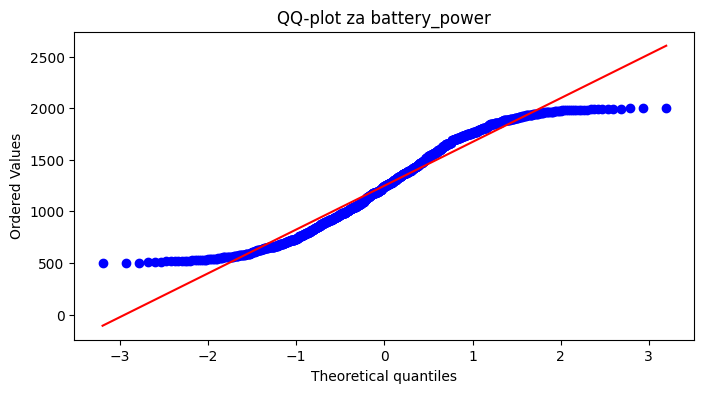

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, probplot

# Učitavanje podataka
data = pd.read_csv('https://raw.githubusercontent.com/hhadzicc/zadaca2/main/test.csv')

# Izdvajanje varijable "battery_power"
battery_power = data['battery_power']

# Kolmogorov-Smirnov test
ks_statistic, ks_pvalue = kstest(battery_power, 'norm')
print("Kolmogorov-Smirnov test:")
print("Statistika:", ks_statistic)
print("P-vrijednost:", ks_pvalue)

# Postavljanje nulte hipoteze za Kolmogorov-Smirnov test:
# H0: Varijabla "battery_power" prati normalnu distribuciju

alpha = 0.05  #0.05-0.1

if ks_pvalue > alpha:
    print("Nulta hipoteza ne može biti odbačena.")
    print("Varijabla 'battery_power' se može smatrati normalno distribuiranom.")
else:
    print("Nulta hipoteza je odbačena.")
    print("Varijabla 'battery_power' se ne može smatrati normalno distribuiranom.")

# Shapiro-Wilk test
shapiro_statistic, shapiro_pvalue = shapiro(battery_power)
print("\nShapiro-Wilk test:")
print("Statistika:", shapiro_statistic)
print("P-vrijednost:", shapiro_pvalue)

# Postavljanje nulte hipoteze za Shapiro-Wilk test:
# H0: Varijabla "battery_power" prati normalnu distribuciju

if shapiro_pvalue > alpha:
    print("Nulta hipoteza ne može biti odbačena.")
    print("Varijabla 'battery_power' se može smatrati normalno distribuiranom.")
else:
    print("Nulta hipoteza je odbačena.")
    print("Varijabla 'battery_power' se ne može smatrati normalno distribuiranom.")

# QQ-plot
plt.figure(figsize=(8, 4))
probplot(battery_power, plot=plt)
plt.title("QQ-plot za battery_power")
plt.show()


Sada odradimo dati zadatak za varijablu "clock_speed"<br>
Nulta hipoteza (H0): Varijabla "clock_speed" prati normalnu distribuciju<br>
Alternativna hipoteza (H1): Varijabla "clock_speed" ne prati normalnu distribuciju

Kolmogorov-Smirnov test:
Statistika: 0.6914624612740131
P-vrijednost: 0.0
Nulta hipoteza je odbačena.
Varijabla 'clock_speed' se ne može smatrati normalno distribuiranom.

Shapiro-Wilk test:
Statistika: 0.9098937511444092
P-vrijednost: 7.255753279605614e-24
Nulta hipoteza je odbačena.
Varijabla 'clock_speed' se ne može smatrati normalno distribuiranom.


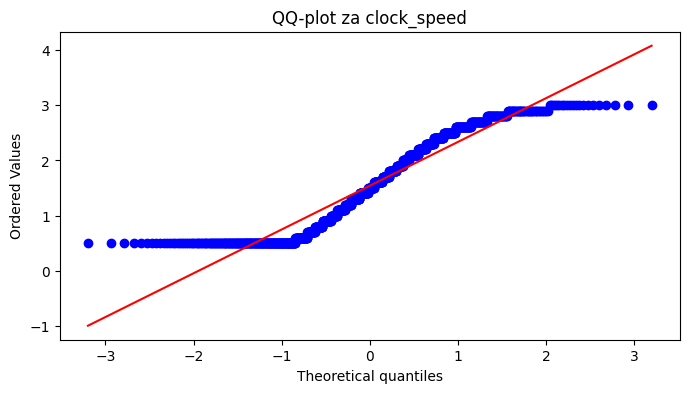

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, probplot

# Učitavanje podataka
data = pd.read_csv('https://raw.githubusercontent.com/hhadzicc/zadaca2/main/test.csv')

# Izdvajanje varijable "clock_speed"
clock_speed = data['clock_speed']

# Kolmogorov-Smirnov test
ks_statistic, ks_pvalue = kstest(clock_speed, 'norm')
print("Kolmogorov-Smirnov test:")
print("Statistika:", ks_statistic)
print("P-vrijednost:", ks_pvalue)

# Postavljanje nulte hipoteze za Kolmogorov-Smirnov test:
# H0: Varijabla "clock_speed" prati normalnu distribuciju

alpha = 0.05  #0.05-0.1

if ks_pvalue > alpha:
    print("Nulta hipoteza ne može biti odbačena.")
    print("Varijabla 'clock_speed' se može smatrati normalno distribuiranom.")
else:
    print("Nulta hipoteza je odbačena.")
    print("Varijabla 'clock_speed' se ne može smatrati normalno distribuiranom.")

# Shapiro-Wilk test
shapiro_statistic, shapiro_pvalue = shapiro(clock_speed)
print("\nShapiro-Wilk test:")
print("Statistika:", shapiro_statistic)
print("P-vrijednost:", shapiro_pvalue)

# Postavljanje nulte hipoteze za Shapiro-Wilk test:
# H0: Varijabla "clock_speed" prati normalnu distribuciju

if shapiro_pvalue > alpha:
    print("Nulta hipoteza ne može biti odbačena.")
    print("Varijabla 'clock_speed' se može smatrati normalno distribuiranom.")
else:
    print("Nulta hipoteza je odbačena.")
    print("Varijabla 'clock_speed' se ne može smatrati normalno distribuiranom.")

# QQ-plot
plt.figure(figsize=(8, 4))
probplot(clock_speed, plot=plt)
plt.title("QQ-plot za clock_speed")
plt.show()

Sada odradimo dati zadatak za varijablu "fc"<br>
Nulta hipoteza (H0): Varijabla "fc" prati normalnu distribuciju<br>
Alternativna hipoteza (H1): Varijabla "fc" ne prati normalnu distribuciju

Kolmogorov-Smirnov test:
Statistika: 0.6432498680518208
P-vrijednost: 0.0
Nulta hipoteza je odbačena.
Varijabla 'fc' se ne može smatrati normalno distribuiranom.

Shapiro-Wilk test:
Statistika: 0.8838744759559631
P-vrijednost: 1.0455453044978449e-26
Nulta hipoteza je odbačena.
Varijabla 'fc' se ne može smatrati normalno distribuiranom.


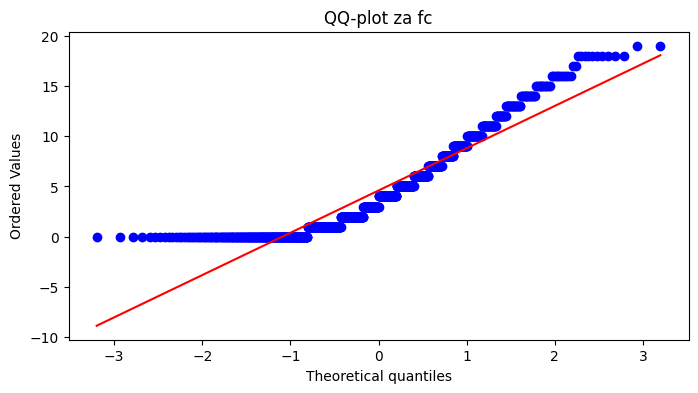

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, probplot

# Učitavanje podataka
data = pd.read_csv('https://raw.githubusercontent.com/hhadzicc/zadaca2/main/test.csv')

# Izdvajanje varijable "fc"
fc = data['fc']

# Kolmogorov-Smirnov test
ks_statistic, ks_pvalue = kstest(fc, 'norm')
print("Kolmogorov-Smirnov test:")
print("Statistika:", ks_statistic)
print("P-vrijednost:", ks_pvalue)

# Postavljanje nulte hipoteze za Kolmogorov-Smirnov test:
# H0: Varijabla "fc" prati normalnu distribuciju

alpha = 0.05  #0.05-0.1

if ks_pvalue > alpha:
    print("Nulta hipoteza ne može biti odbačena.")
    print("Varijabla 'fc' se može smatrati normalno distribuiranom.")
else:
    print("Nulta hipoteza je odbačena.")
    print("Varijabla 'fc' se ne može smatrati normalno distribuiranom.")

# Shapiro-Wilk test
shapiro_statistic, shapiro_pvalue = shapiro(fc)
print("\nShapiro-Wilk test:")
print("Statistika:", shapiro_statistic)
print("P-vrijednost:", shapiro_pvalue)

# Postavljanje nulte hipoteze za Shapiro-Wilk test:
# H0: Varijabla "fc" prati normalnu distribuciju

if shapiro_pvalue > alpha:
    print("Nulta hipoteza ne može biti odbačena.")
    print("Varijabla 'fc' se može smatrati normalno distribuiranom.")
else:
    print("Nulta hipoteza je odbačena.")
    print("Varijabla 'fc' se ne može smatrati normalno distribuiranom.")

# QQ-plot
plt.figure(figsize=(8, 4))
probplot(fc, plot=plt)
plt.title("QQ-plot za fc")
plt.show()

Sada odradimo dati zadatak za varijablu "pc"<br>
Nulta hipoteza (H0): Varijabla "pc" prati normalnu distribuciju<br>
Alternativna hipoteza (H1): Varijabla "pc" ne prati normalnu distribuciju

Kolmogorov-Smirnov test:
Statistika: 0.8802498680518208
P-vrijednost: 0.0
Nulta hipoteza je odbačena.
Varijabla 'pc' se ne može smatrati normalno distribuiranom.

Shapiro-Wilk test:
Statistika: 0.9464503526687622
P-vrijednost: 1.4388637183334343e-18
Nulta hipoteza je odbačena.
Varijabla 'pc' se ne može smatrati normalno distribuiranom.


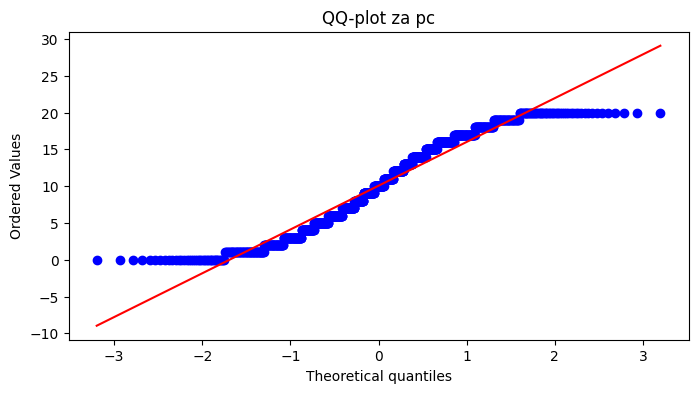

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, probplot

# Učitavanje podataka
data = pd.read_csv('https://raw.githubusercontent.com/hhadzicc/zadaca2/main/test.csv')

# Izdvajanje varijable "pc"
pc = data['pc']

# Kolmogorov-Smirnov test
ks_statistic, ks_pvalue = kstest(pc, 'norm')
print("Kolmogorov-Smirnov test:")
print("Statistika:", ks_statistic)
print("P-vrijednost:", ks_pvalue)

# Postavljanje nulte hipoteze za Kolmogorov-Smirnov test:
# H0: Varijabla "pc" prati normalnu distribuciju

alpha = 0.05  #0.05-0.1

if ks_pvalue > alpha:
    print("Nulta hipoteza ne može biti odbačena.")
    print("Varijabla 'pc' se može smatrati normalno distribuiranom.")
else:
    print("Nulta hipoteza je odbačena.")
    print("Varijabla 'pc' se ne može smatrati normalno distribuiranom.")

# Shapiro-Wilk test
shapiro_statistic, shapiro_pvalue = shapiro(pc)
print("\nShapiro-Wilk test:")
print("Statistika:", shapiro_statistic)
print("P-vrijednost:", shapiro_pvalue)

# Postavljanje nulte hipoteze za Shapiro-Wilk test:
# H0: Varijabla "pc" prati normalnu distribuciju

if shapiro_pvalue > alpha:
    print("Nulta hipoteza ne može biti odbačena.")
    print("Varijabla 'pc' se može smatrati normalno distribuiranom.")
else:
    print("Nulta hipoteza je odbačena.")
    print("Varijabla 'pc' se ne može smatrati normalno distribuiranom.")

# QQ-plot
plt.figure(figsize=(8, 4))
probplot(pc, plot=plt)
plt.title("QQ-plot za pc")
plt.show()

Sada odradimo dati zadatak za varijablu "int_memory"<br>
Nulta hipoteza (H0): Varijabla "int_memory" prati normalnu distribuciju<br>
Alternativna hipoteza (H1): Varijabla "int_memory" ne prati normalnu distribuciju

Kolmogorov-Smirnov test:
Statistika: 0.9846501019683699
P-vrijednost: 0.0
Nulta hipoteza je odbačena.
Varijabla 'int_memory' se ne može smatrati normalno distribuiranom.

Shapiro-Wilk test:
Statistika: 0.9560279846191406
P-vrijednost: 9.504197373882411e-17
Nulta hipoteza je odbačena.
Varijabla 'int_memory' se ne može smatrati normalno distribuiranom.


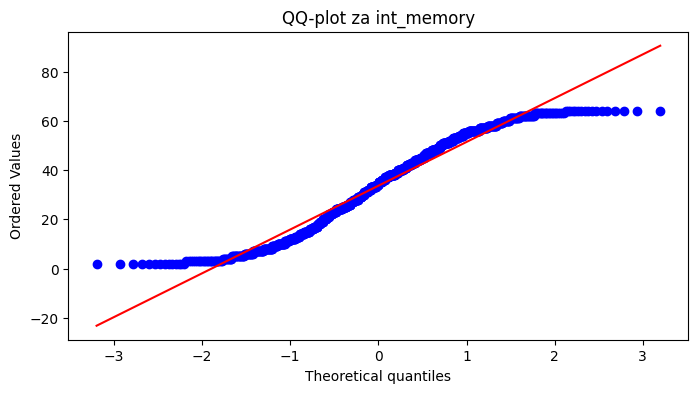

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, probplot

# Učitavanje podataka
data = pd.read_csv('https://raw.githubusercontent.com/hhadzicc/zadaca2/main/test.csv')

# Izdvajanje varijable "int_memory"
int_memory = data['int_memory']

# Kolmogorov-Smirnov test
ks_statistic, ks_pvalue = kstest(int_memory, 'norm')
print("Kolmogorov-Smirnov test:")
print("Statistika:", ks_statistic)
print("P-vrijednost:", ks_pvalue)

# Postavljanje nulte hipoteze za Kolmogorov-Smirnov test:
# H0: Varijabla "int_memory" prati normalnu distribuciju

alpha = 0.05  #0.05-0.1

if ks_pvalue > alpha:
    print("Nulta hipoteza ne može biti odbačena.")
    print("Varijabla 'int_memory' se može smatrati normalno distribuiranom.")
else:
    print("Nulta hipoteza je odbačena.")
    print("Varijabla 'int_memory' se ne može smatrati normalno distribuiranom.")

# Shapiro-Wilk test
shapiro_statistic, shapiro_pvalue = shapiro(int_memory)
print("\nShapiro-Wilk test:")
print("Statistika:", shapiro_statistic)
print("P-vrijednost:", shapiro_pvalue)

# Postavljanje nulte hipoteze za Shapiro-Wilk test:
# H0: Varijabla "int_memory" prati normalnu distribuciju

if shapiro_pvalue > alpha:
    print("Nulta hipoteza ne može biti odbačena.")
    print("Varijabla 'int_memory' se može smatrati normalno distribuiranom.")
else:
    print("Nulta hipoteza je odbačena.")
    print("Varijabla 'int_memory' se ne može smatrati normalno distribuiranom.")

# QQ-plot
plt.figure(figsize=(8, 4))
probplot(int_memory, plot=plt)
plt.title("QQ-plot za int_memory")
plt.show()

Sada odradimo dati zadatak za varijablu "m_dep"<br>
Nulta hipoteza (H0): Varijabla "m_dep" prati normalnu distribuciju<br>
Alternativna hipoteza (H1): Varijabla "m_dep" ne prati normalnu distribuciju

Kolmogorov-Smirnov test:
Statistika: 0.539827837277029
P-vrijednost: 2.8515027077583573e-273
Nulta hipoteza je odbačena.
Varijabla 'm_dep' se ne može smatrati normalno distribuiranom.

Shapiro-Wilk test:
Statistika: 0.9350324273109436
P-vrijednost: 1.8783076128164298e-20
Nulta hipoteza je odbačena.
Varijabla 'm_dep' se ne može smatrati normalno distribuiranom.


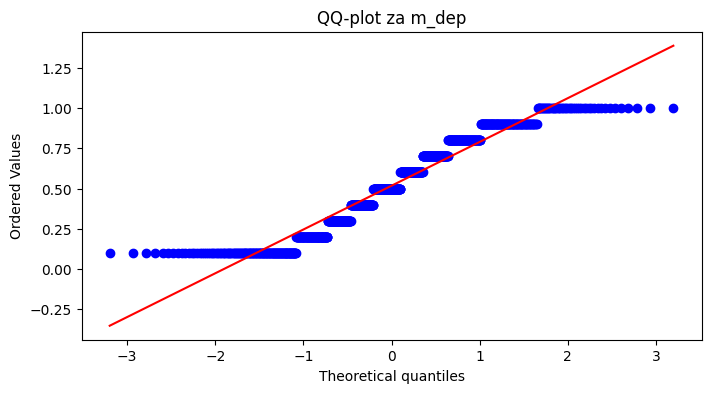

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, probplot

# Učitavanje podataka
data = pd.read_csv('https://raw.githubusercontent.com/hhadzicc/zadaca2/main/test.csv')

# Izdvajanje varijable "m_dep"
m_dep = data['m_dep']

# Kolmogorov-Smirnov test
ks_statistic, ks_pvalue = kstest(m_dep, 'norm')
print("Kolmogorov-Smirnov test:")
print("Statistika:", ks_statistic)
print("P-vrijednost:", ks_pvalue)

# Postavljanje nulte hipoteze za Kolmogorov-Smirnov test:
# H0: Varijabla "m_dep" prati normalnu distribuciju

alpha = 0.05  #0.05-0.1

if ks_pvalue > alpha:
    print("Nulta hipoteza ne može biti odbačena.")
    print("Varijabla 'm_dep' se može smatrati normalno distribuiranom.")
else:
    print("Nulta hipoteza je odbačena.")
    print("Varijabla 'm_dep' se ne može smatrati normalno distribuiranom.")

# Shapiro-Wilk test
shapiro_statistic, shapiro_pvalue = shapiro(m_dep)
print("\nShapiro-Wilk test:")
print("Statistika:", shapiro_statistic)
print("P-vrijednost:", shapiro_pvalue)

# Postavljanje nulte hipoteze za Shapiro-Wilk test:
# H0: Varijabla "m_dep" prati normalnu distribuciju

if shapiro_pvalue > alpha:
    print("Nulta hipoteza ne može biti odbačena.")
    print("Varijabla 'm_dep' se može smatrati normalno distribuiranom.")
else:
    print("Nulta hipoteza je odbačena.")
    print("Varijabla 'm_dep' se ne može smatrati normalno distribuiranom.")

# QQ-plot
plt.figure(figsize=(8, 4))
probplot(m_dep, plot=plt)
plt.title("QQ-plot za m_dep")
plt.show()

Sada odradimo dati zadatak za varijablu "mobile_wt"<br>
Nulta hipoteza (H0): Varijabla "mobile_wt" prati normalnu distribuciju<br>
Alternativna hipoteza (H1): Varijabla "mobile_wt" ne prati normalnu distribuciju

Kolmogorov-Smirnov test:
Statistika: 1.0
P-vrijednost: 0.0
Nulta hipoteza je odbačena.
Varijabla 'mobile_wt' se ne može smatrati normalno distribuiranom.

Shapiro-Wilk test:
Statistika: 0.9549385905265808
P-vrijednost: 5.72078707211715e-17
Nulta hipoteza je odbačena.
Varijabla 'mobile_wt' se ne može smatrati normalno distribuiranom.


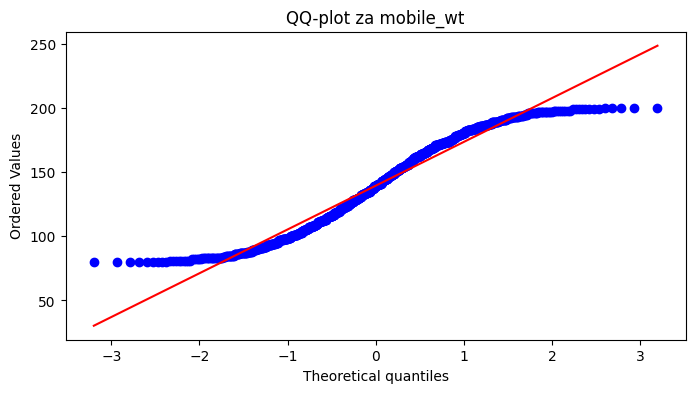

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, probplot

# Učitavanje podataka
data = pd.read_csv('https://raw.githubusercontent.com/hhadzicc/zadaca2/main/test.csv')

# Izdvajanje varijable "mobile_wt"
mobile_wt = data['mobile_wt']

# Kolmogorov-Smirnov test
ks_statistic, ks_pvalue = kstest(mobile_wt, 'norm')
print("Kolmogorov-Smirnov test:")
print("Statistika:", ks_statistic)
print("P-vrijednost:", ks_pvalue)

# Postavljanje nulte hipoteze za Kolmogorov-Smirnov test:
# H0: Varijabla "mobile_wt" prati normalnu distribuciju

alpha = 0.05  #0.05-0.1

if ks_pvalue > alpha:
    print("Nulta hipoteza ne može biti odbačena.")
    print("Varijabla 'mobile_wt' se može smatrati normalno distribuiranom.")
else:
    print("Nulta hipoteza je odbačena.")
    print("Varijabla 'mobile_wt' se ne može smatrati normalno distribuiranom.")

# Shapiro-Wilk test
shapiro_statistic, shapiro_pvalue = shapiro(mobile_wt)
print("\nShapiro-Wilk test:")
print("Statistika:", shapiro_statistic)
print("P-vrijednost:", shapiro_pvalue)

# Postavljanje nulte hipoteze za Shapiro-Wilk test:
# H0: Varijabla "mobile_wt" prati normalnu distribuciju

if shapiro_pvalue > alpha:
    print("Nulta hipoteza ne može biti odbačena.")
    print("Varijabla 'mobile_wt' se može smatrati normalno distribuiranom.")
else:
    print("Nulta hipoteza je odbačena.")
    print("Varijabla 'mobile_wt' se ne može smatrati normalno distribuiranom.")

# QQ-plot
plt.figure(figsize=(8, 4))
probplot(mobile_wt, plot=plt)
plt.title("QQ-plot za mobile_wt")
plt.show()

Sada odradimo dati zadatak za varijablu "n_cores"<br>
Nulta hipoteza (H0): Varijabla "n_cores" prati normalnu distribuciju<br>
Alternativna hipoteza (H1): Varijabla "n_cores" ne prati normalnu distribuciju

Kolmogorov-Smirnov test:
Statistika: 0.8413447460685429
P-vrijednost: 0.0
Nulta hipoteza je odbačena.
Varijabla 'n_cores' se ne može smatrati normalno distribuiranom.

Shapiro-Wilk test:
Statistika: 0.9254670739173889
P-vrijednost: 7.497872235684474e-22
Nulta hipoteza je odbačena.
Varijabla 'n_cores' se ne može smatrati normalno distribuiranom.


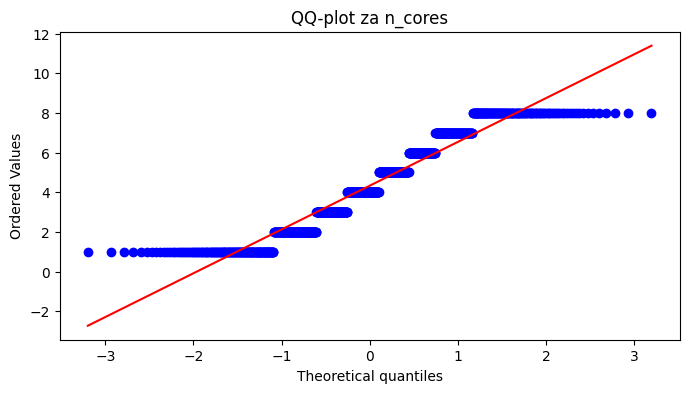

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, probplot

# Učitavanje podataka
data = pd.read_csv('https://raw.githubusercontent.com/hhadzicc/zadaca2/main/test.csv')

# Izdvajanje varijable "n_cores"
n_cores = data['n_cores']

# Kolmogorov-Smirnov test
ks_statistic, ks_pvalue = kstest(n_cores, 'norm')
print("Kolmogorov-Smirnov test:")
print("Statistika:", ks_statistic)
print("P-vrijednost:", ks_pvalue)

# Postavljanje nulte hipoteze za Kolmogorov-Smirnov test:
# H0: Varijabla "n_cores" prati normalnu distribuciju

alpha = 0.05  #0.05-0.1

if ks_pvalue > alpha:
    print("Nulta hipoteza ne može biti odbačena.")
    print("Varijabla 'n_cores' se može smatrati normalno distribuiranom.")
else:
    print("Nulta hipoteza je odbačena.")
    print("Varijabla 'n_cores' se ne može smatrati normalno distribuiranom.")

# Shapiro-Wilk test
shapiro_statistic, shapiro_pvalue = shapiro(n_cores)
print("\nShapiro-Wilk test:")
print("Statistika:", shapiro_statistic)
print("P-vrijednost:", shapiro_pvalue)

# Postavljanje nulte hipoteze za Shapiro-Wilk test:
# H0: Varijabla "n_cores" prati normalnu distribuciju

if shapiro_pvalue > alpha:
    print("Nulta hipoteza ne može biti odbačena.")
    print("Varijabla 'n_cores' se može smatrati normalno distribuiranom.")
else:
    print("Nulta hipoteza je odbačena.")
    print("Varijabla 'n_cores' se ne može smatrati normalno distribuiranom.")

# QQ-plot
plt.figure(figsize=(8, 4))
probplot(n_cores, plot=plt)
plt.title("QQ-plot za n_cores")
plt.show()

Sada odradimo dati zadatak za varijablu "px_height"<br>
Nulta hipoteza (H0): Varijabla "px_height" prati normalnu distribuciju<br>
Alternativna hipoteza (H1): Varijabla "px_height" ne prati normalnu distribuciju

Kolmogorov-Smirnov test:
Statistika: 0.9959683287581669
P-vrijednost: 0.0
Nulta hipoteza je odbačena.
Varijabla 'px_height' se ne može smatrati normalno distribuiranom.

Shapiro-Wilk test:
Statistika: 0.953100323677063
P-vrijednost: 2.4766151499307172e-17
Nulta hipoteza je odbačena.
Varijabla 'px_height' se ne može smatrati normalno distribuiranom.


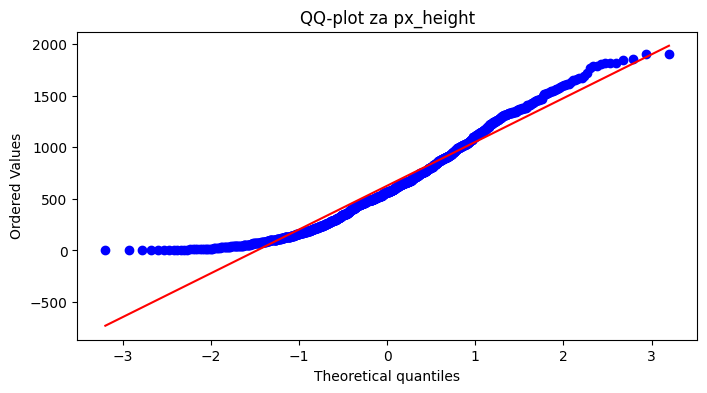

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, probplot

# Učitavanje podataka
data = pd.read_csv('https://raw.githubusercontent.com/hhadzicc/zadaca2/main/test.csv')

# Izdvajanje varijable "px_height"
px_height = data['px_height']

# Kolmogorov-Smirnov test
ks_statistic, ks_pvalue = kstest(px_height, 'norm')
print("Kolmogorov-Smirnov test:")
print("Statistika:", ks_statistic)
print("P-vrijednost:", ks_pvalue)

# Postavljanje nulte hipoteze za Kolmogorov-Smirnov test:
# H0: Varijabla "px_height" prati normalnu distribuciju

alpha = 0.05  #0.05-0.1

if ks_pvalue > alpha:
    print("Nulta hipoteza ne može biti odbačena.")
    print("Varijabla 'px_height' se može smatrati normalno distribuiranom.")
else:
    print("Nulta hipoteza je odbačena.")
    print("Varijabla 'px_height' se ne može smatrati normalno distribuiranom.")

# Shapiro-Wilk test
shapiro_statistic, shapiro_pvalue = shapiro(px_height)
print("\nShapiro-Wilk test:")
print("Statistika:", shapiro_statistic)
print("P-vrijednost:", shapiro_pvalue)

# Postavljanje nulte hipoteze za Shapiro-Wilk test:
# H0: Varijabla "px_height" prati normalnu distribuciju

if shapiro_pvalue > alpha:
    print("Nulta hipoteza ne može biti odbačena.")
    print("Varijabla 'px_height' se može smatrati normalno distribuiranom.")
else:
    print("Nulta hipoteza je odbačena.")
    print("Varijabla 'px_height' se ne može smatrati normalno distribuiranom.")

# QQ-plot
plt.figure(figsize=(8, 4))
probplot(px_height, plot=plt)
plt.title("QQ-plot za px_height")
plt.show()

Sada odradimo dati zadatak za varijablu "px_width"<br>
Nulta hipoteza (H0): Varijabla "px_width" prati normalnu distribuciju<br>
Alternativna hipoteza (H1): Varijabla "px_width" ne prati normalnu distribuciju

Kolmogorov-Smirnov test:
Statistika: 1.0
P-vrijednost: 0.0
Nulta hipoteza je odbačena.
Varijabla 'px_width' se ne može smatrati normalno distribuiranom.

Shapiro-Wilk test:
Statistika: 0.9481080174446106
P-vrijednost: 2.8528545292377053e-18
Nulta hipoteza je odbačena.
Varijabla 'px_width' se ne može smatrati normalno distribuiranom.


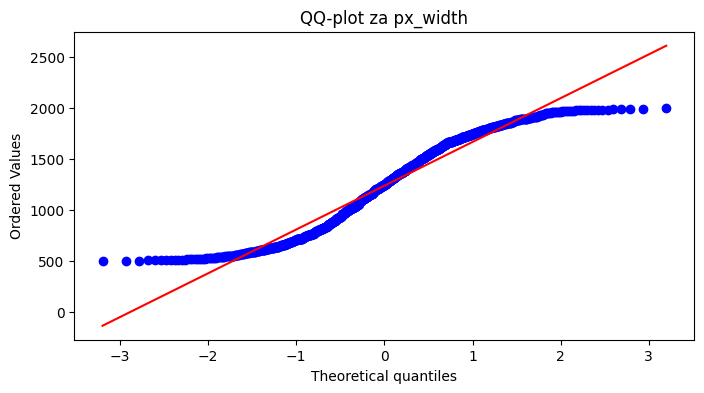

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, probplot

# Učitavanje podataka
data = pd.read_csv('https://raw.githubusercontent.com/hhadzicc/zadaca2/main/test.csv')

# Izdvajanje varijable "px_width"
px_width = data['px_width']

# Kolmogorov-Smirnov test
ks_statistic, ks_pvalue = kstest(px_width, 'norm')
print("Kolmogorov-Smirnov test:")
print("Statistika:", ks_statistic)
print("P-vrijednost:", ks_pvalue)

# Postavljanje nulte hipoteze za Kolmogorov-Smirnov test:
# H0: Varijabla "px_width" prati normalnu distribuciju

alpha = 0.05  #0.05-0.1

if ks_pvalue > alpha:
    print("Nulta hipoteza ne može biti odbačena.")
    print("Varijabla 'px_width' se može smatrati normalno distribuiranom.")
else:
    print("Nulta hipoteza je odbačena.")
    print("Varijabla 'px_width' se ne može smatrati normalno distribuiranom.")

# Shapiro-Wilk test
shapiro_statistic, shapiro_pvalue = shapiro(px_width)
print("\nShapiro-Wilk test:")
print("Statistika:", shapiro_statistic)
print("P-vrijednost:", shapiro_pvalue)

# Postavljanje nulte hipoteze za Shapiro-Wilk test:
# H0: Varijabla "px_width" prati normalnu distribuciju

if shapiro_pvalue > alpha:
    print("Nulta hipoteza ne može biti odbačena.")
    print("Varijabla 'px_width' se može smatrati normalno distribuiranom.")
else:
    print("Nulta hipoteza je odbačena.")
    print("Varijabla 'px_width' se ne može smatrati normalno distribuiranom.")

# QQ-plot
plt.figure(figsize=(8, 4))
probplot(px_width, plot=plt)
plt.title("QQ-plot za px_width")
plt.show()

Sada odradimo dati zadatak za varijablu "ram"<br>
Nulta hipoteza (H0): Varijabla "ram" prati normalnu distribuciju<br>
Alternativna hipoteza (H1): Varijabla "ram" ne prati normalnu distribuciju

Kolmogorov-Smirnov test:
Statistika: 1.0
P-vrijednost: 0.0
Nulta hipoteza je odbačena.
Varijabla 'ram' se ne može smatrati normalno distribuiranom.

Shapiro-Wilk test:
Statistika: 0.9539456367492676
P-vrijednost: 3.6289035512521964e-17
Nulta hipoteza je odbačena.
Varijabla 'ram' se ne može smatrati normalno distribuiranom.


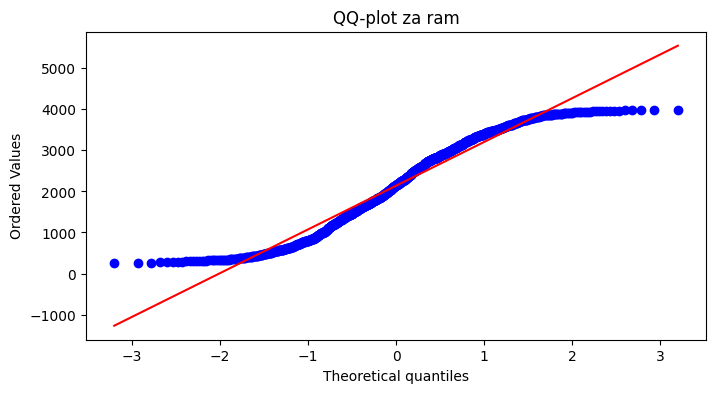

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, probplot

# Učitavanje podataka
data = pd.read_csv('https://raw.githubusercontent.com/hhadzicc/zadaca2/main/test.csv')

# Izdvajanje varijable "ram"
ram = data['ram']

# Kolmogorov-Smirnov test
ks_statistic, ks_pvalue = kstest(ram, 'norm')
print("Kolmogorov-Smirnov test:")
print("Statistika:", ks_statistic)
print("P-vrijednost:", ks_pvalue)

# Postavljanje nulte hipoteze za Kolmogorov-Smirnov test:
# H0: Varijabla "ram" prati normalnu distribuciju

alpha = 0.05  #0.05-0.1

if ks_pvalue > alpha:
    print("Nulta hipoteza ne može biti odbačena.")
    print("Varijabla 'ram' se može smatrati normalno distribuiranom.")
else:
    print("Nulta hipoteza je odbačena.")
    print("Varijabla 'ram' se ne može smatrati normalno distribuiranom.")

# Shapiro-Wilk test
shapiro_statistic, shapiro_pvalue = shapiro(ram)
print("\nShapiro-Wilk test:")
print("Statistika:", shapiro_statistic)
print("P-vrijednost:", shapiro_pvalue)

# Postavljanje nulte hipoteze za Shapiro-Wilk test:
# H0: Varijabla "ram" prati normalnu distribuciju

if shapiro_pvalue > alpha:
    print("Nulta hipoteza ne može biti odbačena.")
    print("Varijabla 'ram' se može smatrati normalno distribuiranom.")
else:
    print("Nulta hipoteza je odbačena.")
    print("Varijabla 'ram' se ne može smatrati normalno distribuiranom.")

# QQ-plot
plt.figure(figsize=(8, 4))
probplot(ram, plot=plt)
plt.title("QQ-plot za ram")
plt.show()

Sada odradimo dati zadatak za varijablu "sc_h"<br>
Nulta hipoteza (H0): Varijabla "sc_h" prati normalnu distribuciju<br>
Alternativna hipoteza (H1): Varijabla "sc_h" ne prati normalnu distribuciju

Kolmogorov-Smirnov test:
Statistika: 0.9999997133484281
P-vrijednost: 0.0
Nulta hipoteza je odbačena.
Varijabla 'sc_h' se ne može smatrati normalno distribuiranom.

Shapiro-Wilk test:
Statistika: 0.9459709525108337
P-vrijednost: 1.1838379384238949e-18
Nulta hipoteza je odbačena.
Varijabla 'sc_h' se ne može smatrati normalno distribuiranom.


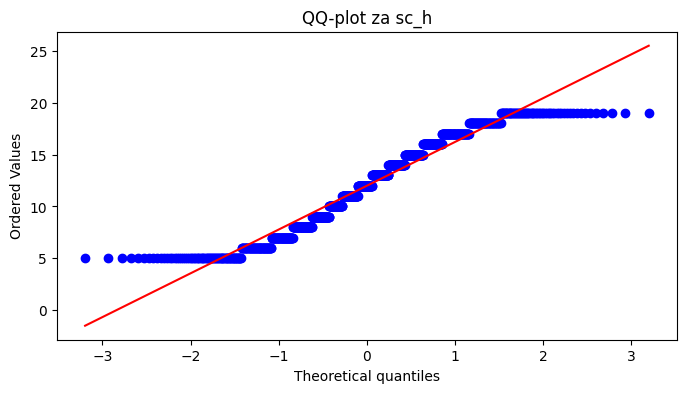

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, probplot

# Učitavanje podataka
data = pd.read_csv('https://raw.githubusercontent.com/hhadzicc/zadaca2/main/test.csv')

# Izdvajanje varijable "sc_h"
sc_h = data['sc_h']

# Kolmogorov-Smirnov test
ks_statistic, ks_pvalue = kstest(sc_h, 'norm')
print("Kolmogorov-Smirnov test:")
print("Statistika:", ks_statistic)
print("P-vrijednost:", ks_pvalue)

# Postavljanje nulte hipoteze za Kolmogorov-Smirnov test:
# H0: Varijabla "sc_h" prati normalnu distribuciju

alpha = 0.05  #0.05-0.1

if ks_pvalue > alpha:
    print("Nulta hipoteza ne može biti odbačena.")
    print("Varijabla 'sc_h' se može smatrati normalno distribuiranom.")
else:
    print("Nulta hipoteza je odbačena.")
    print("Varijabla 'sc_h' se ne može smatrati normalno distribuiranom.")

# Shapiro-Wilk test
shapiro_statistic, shapiro_pvalue = shapiro(sc_h)
print("\nShapiro-Wilk test:")
print("Statistika:", shapiro_statistic)
print("P-vrijednost:", shapiro_pvalue)

# Postavljanje nulte hipoteze za Shapiro-Wilk test:
# H0: Varijabla "sc_h" prati normalnu distribuciju

if shapiro_pvalue > alpha:
    print("Nulta hipoteza ne može biti odbačena.")
    print("Varijabla 'sc_h' se može smatrati normalno distribuiranom.")
else:
    print("Nulta hipoteza je odbačena.")
    print("Varijabla 'sc_h' se ne može smatrati normalno distribuiranom.")

# QQ-plot
plt.figure(figsize=(8, 4))
probplot(sc_h, plot=plt)
plt.title("QQ-plot za sc_h")
plt.show()

Sada odradimo dati zadatak za varijablu "sc_w"<br>
Nulta hipoteza (H0): Varijabla "sc_w" prati normalnu distribuciju<br>
Alternativna hipoteza (H1): Varijabla "sc_w" ne prati normalnu distribuciju

Kolmogorov-Smirnov test:
Statistika: 0.7662498680518208
P-vrijednost: 0.0
Nulta hipoteza je odbačena.
Varijabla 'sc_w' se ne može smatrati normalno distribuiranom.

Shapiro-Wilk test:
Statistika: 0.9284420013427734
P-vrijednost: 1.9721997209245876e-21
Nulta hipoteza je odbačena.
Varijabla 'sc_w' se ne može smatrati normalno distribuiranom.


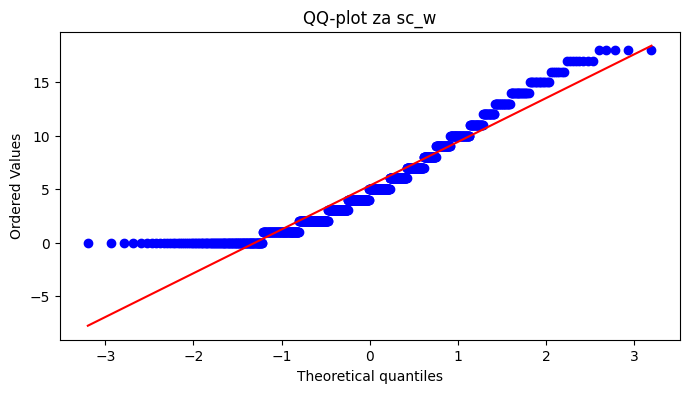

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, probplot

# Učitavanje podataka
data = pd.read_csv('https://raw.githubusercontent.com/hhadzicc/zadaca2/main/test.csv')

# Izdvajanje varijable "sc_w"
sc_w = data['sc_w']

# Kolmogorov-Smirnov test
ks_statistic, ks_pvalue = kstest(sc_w, 'norm')
print("Kolmogorov-Smirnov test:")
print("Statistika:", ks_statistic)
print("P-vrijednost:", ks_pvalue)

# Postavljanje nulte hipoteze za Kolmogorov-Smirnov test:
# H0: Varijabla "sc_w" prati normalnu distribuciju

alpha = 0.05  #0.05-0.1

if ks_pvalue > alpha:
    print("Nulta hipoteza ne može biti odbačena.")
    print("Varijabla 'sc_w' se može smatrati normalno distribuiranom.")
else:
    print("Nulta hipoteza je odbačena.")
    print("Varijabla 'sc_w' se ne može smatrati normalno distribuiranom.")

# Shapiro-Wilk test
shapiro_statistic, shapiro_pvalue = shapiro(sc_w)
print("\nShapiro-Wilk test:")
print("Statistika:", shapiro_statistic)
print("P-vrijednost:", shapiro_pvalue)

# Postavljanje nulte hipoteze za Shapiro-Wilk test:
# H0: Varijabla "sc_w" prati normalnu distribuciju

if shapiro_pvalue > alpha:
    print("Nulta hipoteza ne može biti odbačena.")
    print("Varijabla 'sc_w' se može smatrati normalno distribuiranom.")
else:
    print("Nulta hipoteza je odbačena.")
    print("Varijabla 'sc_w' se ne može smatrati normalno distribuiranom.")

# QQ-plot
plt.figure(figsize=(8, 4))
probplot(sc_w, plot=plt)
plt.title("QQ-plot za sc_w")
plt.show()

Sada odradimo dati zadatak za varijablu "talk_time"<br>
Nulta hipoteza (H0): Varijabla "talk_time" prati normalnu distribuciju<br>
Alternativna hipoteza (H1): Varijabla "talk_time" ne prati normalnu distribuciju

Kolmogorov-Smirnov test:
Statistika: 0.9772498680518208
P-vrijednost: 0.0
Nulta hipoteza je odbačena.
Varijabla 'talk_time' se ne može smatrati normalno distribuiranom.

Shapiro-Wilk test:
Statistika: 0.9486278295516968
P-vrijednost: 3.547273480656585e-18
Nulta hipoteza je odbačena.
Varijabla 'talk_time' se ne može smatrati normalno distribuiranom.


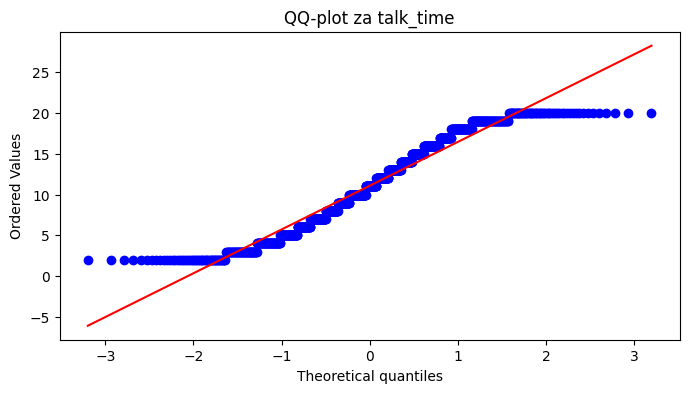

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, probplot

# Učitavanje podataka
data = pd.read_csv('https://raw.githubusercontent.com/hhadzicc/zadaca2/main/test.csv')

# Izdvajanje varijable "talk_time"
talk_time = data['talk_time']

# Kolmogorov-Smirnov test
ks_statistic, ks_pvalue = kstest(talk_time, 'norm')
print("Kolmogorov-Smirnov test:")
print("Statistika:", ks_statistic)
print("P-vrijednost:", ks_pvalue)

# Postavljanje nulte hipoteze za Kolmogorov-Smirnov test:
# H0: Varijabla "talk_time" prati normalnu distribuciju

alpha = 0.05  #0.05-0.1

if ks_pvalue > alpha:
    print("Nulta hipoteza ne može biti odbačena.")
    print("Varijabla 'talk_time' se može smatrati normalno distribuiranom.")
else:
    print("Nulta hipoteza je odbačena.")
    print("Varijabla 'talk_time' se ne može smatrati normalno distribuiranom.")

# Shapiro-Wilk test
shapiro_statistic, shapiro_pvalue = shapiro(talk_time)
print("\nShapiro-Wilk test:")
print("Statistika:", shapiro_statistic)
print("P-vrijednost:", shapiro_pvalue)

# Postavljanje nulte hipoteze za Shapiro-Wilk test:
# H0: Varijabla "talk_time" prati normalnu distribuciju

if shapiro_pvalue > alpha:
    print("Nulta hipoteza ne može biti odbačena.")
    print("Varijabla 'talk_time' se može smatrati normalno distribuiranom.")
else:
    print("Nulta hipoteza je odbačena.")
    print("Varijabla 'talk_time' se ne može smatrati normalno distribuiranom.")

# QQ-plot
plt.figure(figsize=(8, 4))
probplot(talk_time, plot=plt)
plt.title("QQ-plot za talk_time")
plt.show()

ZAKLJUČAK: <br>
Nijedna numerička varijabla ne prati normalnu distribuciju!

# <font size="+3">**Za numeričke varijable uraditi estimaciju intervala pouzdanosti srednje vrijednosti, a odabir odgovarajuće statistika uraditi na osnovu veličine odabranog seta podataka (confidence intervals).**

Pošto nam je uzorak dovoljno velik, primijenit ćemo normalnu statistiku:

In [ ]:
import numpy as np
import scipy.stats as st
import pandas as pd

# Definišemo numeričke varijable
numeric_variables = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
                     'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

data = pd.read_csv('https://raw.githubusercontent.com/hhadzicc/zadaca2/main/test.csv')

numeric_data = data[numeric_variables]

# Računamo interval pouzdanosti koristeći normalnu statistiku, nivo pouzdanosti alfa=0.99
confidence_intervals = []
for column in numeric_data.columns:
    interval = st.norm.interval(confidence=0.99, loc=np.mean(numeric_data[column]), scale=st.sem(numeric_data[column]))
    confidence_intervals.append(interval)

#Određujemo gornju i donju granicu

lower_bounds = [interval[0] for interval in confidence_intervals]
upper_bounds = [interval[1] for interval in confidence_intervals]

# Ispisujemo rezultate
for i, column in enumerate(numeric_variables):
    print("Interval pouzdanosti za ", column, ":", confidence_intervals[i])
    print("Donja granica:", lower_bounds[i])
    print("Gornja granica:", upper_bounds[i])
    print()


Interval pouzdanosti za  battery_power : (1213.2841693446367, 1283.7358306553633)
Donja granica: 1213.2841693446367
Gornja granica: 1283.7358306553633

Interval pouzdanosti za  clock_speed : (1.473352105592543, 1.6084478944074574)
Donja granica: 1.473352105592543
Gornja granica: 1.6084478944074574

Interval pouzdanosti za  fc : (4.229440401464467, 4.956559598535533)
Donja granica: 4.229440401464467
Gornja granica: 4.956559598535533

Interval pouzdanosti za  int_memory : (32.17532950436893, 35.12867049563107)
Donja granica: 32.17532950436893
Gornja granica: 35.12867049563107

Interval pouzdanosti za  m_dep : (0.49462254141881445, 0.5403774585811855)
Donja granica: 0.49462254141881445
Gornja granica: 0.5403774585811855

Interval pouzdanosti za  mobile_wt : (136.6721713966776, 142.34982860332238)
Donja granica: 136.6721713966776
Gornja granica: 142.34982860332238

Interval pouzdanosti za  n_cores : (4.141618650751545, 4.514381349248455)
Donja granica: 4.141618650751545
Gornja granica: 4.5

Zaključak: Za svaku numeričku varijablu, dobili smo interval pouzdanosti koji nam pruža raspon vrijednosti unutar kojeg očekujemo da se nalazi srednja vrijednost te varijable sa 99% pouzdanošću.

Očekivana srednja vrijednost ovih varijabli u populaciji najvjerovatnije leži unutar navedenih intervala. Što je uži interval, to je veća preciznost procjene srednje vrijednosti, npr. jedan od najmanjih intervala je interval pouzdanosti za m_dep, što znači da je procjena srednje vrijednosti za ovu numeričku varijablu vrlo precizna.

S druge strane, jedan od širih intervala je battery_power, što ukazuje na veću varijabilnost u procjeni srednje vrijednosti. Ovdje postoji veća nesigurnost u procjeni stvarne srednje vrijednosti ove numeričke varijable.

# <font size="+3">**Za kategorijske varijable uraditi estimaciju intervala pouzdanosti proporcije (confidence intervals for proportions).**

Prvo ćemo provjeriti koliko je svaka kategorijska varijabla zastupljena u ukupnom broju telefona:

In [ ]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/hhadzicc/zadaca2/main/test.csv')

# Kategorijske varijable
categories = ['wifi', 'blue', 'dual_sim', 'touch_screen', 'four_g', 'three_g']

# Ukupan broj telefona
total_count = data.shape[0]

# Provjerava zastupljenost svake kategorije
for category in categories:
    count = data[category].sum()
    proportion = count / total_count
    print(f'Kategorija: {category}')
    print(f'Broj telefona: {count}')
    print(f'Proporcija: {proportion}')
    print()


Kategorija: wifi
Broj telefona: 507
Proporcija: 0.507

Kategorija: blue
Broj telefona: 516
Proporcija: 0.516

Kategorija: dual_sim
Broj telefona: 517
Proporcija: 0.517

Kategorija: touch_screen
Broj telefona: 500
Proporcija: 0.5

Kategorija: four_g
Broj telefona: 487
Proporcija: 0.487

Kategorija: three_g
Broj telefona: 756
Proporcija: 0.756



U ovim podacima, proporcija se odnosi na postotak telefona koji pripadaju određenoj kategoriji u odnosu na ukupan broj telefona. Ove proporcije daju nam informaciju o relativnom udjelu telefona koji podržavaju određene mogućnosti u ukupnom broju telefona.

Intervali pouzdanosti nam pružaju raspon vrijednosti u kojem se očekuje da se nalazi stvarna proporcija u populaciji. Obradićemo svaku kategorijsku varijablu pojedinačno:

In [ ]:
import pandas as pd
import statsmodels.stats.proportion as smprop

data = pd.read_csv('https://raw.githubusercontent.com/hhadzicc/zadaca2/main/test.csv')

# Kategorija wifi
category = 'wifi'

# Proizvoljno određujemo interval pouzdanosti
confidence_level = 0.95

count_wifi = data[data[category] == 1].shape[0]  # Broj telefona s Wi-Fi-om (vrijednost 1)
count_no_wifi = data[data[category] == 0].shape[0]  # Broj telefona bez Wi-Fi-a (vrijednost 0)
nobs = count_wifi + count_no_wifi  # Ukupan broj telefona

# Računamo interval pouzdanosti za telefona s Wi-Fi-om
confidence_interval_wifi = smprop.proportion_confint(count_wifi, nobs, alpha=(1 - confidence_level), method='normal')

# Računamo interval pouzdanosti za telefone bez Wi-Fi-a
confidence_interval_no_wifi = smprop.proportion_confint(count_no_wifi, nobs, alpha=(1 - confidence_level), method='normal')

# Ispisujemo rezultate
print(f'Kategorija: {category}')
print(f'Broj telefona s Wi-Fi-om: {count_wifi}')
print(f'Interval pouzdanosti proporcije za telefona s WiFi-jem: {confidence_interval_wifi}')
print()
print(f'Broj telefona bez Wi-Fi-a: {count_no_wifi}')
print(f'Interval pouzdanosti proporcije za telefone bez WiFi-ja: {confidence_interval_no_wifi}')


Kategorija: wifi
Broj telefona s Wi-Fi-om: 507
Interval pouzdanosti proporcije za telefona s WiFi-jem: (0.4760132855292576, 0.5379867144707424)

Broj telefona bez Wi-Fi-a: 493
Interval pouzdanosti proporcije za telefone bez WiFi-ja: (0.4620132855292576, 0.5239867144707424)


Na osnovu ovih intervala pouzdanosti propocije, sa 95% pouzdanošću možemo tvrditi da se stvarna proporcija telefona sa WiFi-jem nalazi unutar ovih intervala.
Vidimo da intervali pouzdanosti proporcije za obje kategorije imaju vrijednosti koje se preklapaju, što znači da nema statistički značajne razlike u proporcijama telefona sa WiFi-jem i bez.

In [ ]:
import pandas as pd
import statsmodels.stats.proportion as smprop

data = pd.read_csv('https://raw.githubusercontent.com/hhadzicc/zadaca2/main/test.csv')

# Kategorija blue
category = 'blue'

# Proizvoljno određujemo interval pouzdanosti
confidence_level = 0.95

count_blue = data[data[category] == 1].shape[0]  # Broj telefona s blue (vrijednost 1)
count_no_blue = data[data[category] == 0].shape[0]  # Broj telefona bez blue (vrijednost 0)
nobs = count_blue + count_no_blue  # Ukupan broj telefona

# Računamo interval pouzdanosti za telefone s blue
confidence_interval_blue = smprop.proportion_confint(count_blue, nobs, alpha=(1 - confidence_level), method='normal')

# Računamo interval pouzdanosti za telefone bez blue
confidence_interval_no_blue = smprop.proportion_confint(count_no_blue, nobs, alpha=(1 - confidence_level), method='normal')

# Ispisujemo rezultate
print(f'Kategorija: {category}')
print(f'Broj telefona s blue: {count_blue}')
print(f'Interval pouzdanosti proporcije za telefone sa Bluetooth-om: {confidence_interval_blue}')
print()
print(f'Broj telefona bez blue: {count_no_blue}')
print(f'Interval pouzdanosti proporcije za telefone bez Bluetooth-a: {confidence_interval_no_blue}')


Kategorija: blue
Broj telefona s blue: 516
Interval pouzdanosti proporcije za telefone sa Bluetooth-om: (0.4850261192015687, 0.5469738807984313)

Broj telefona bez blue: 484
Interval pouzdanosti proporcije za telefone bez Bluetooth-a: (0.45302611920156866, 0.5149738807984313)


In [ ]:
import pandas as pd
import statsmodels.stats.proportion as smprop

data = pd.read_csv('https://raw.githubusercontent.com/hhadzicc/zadaca2/main/test.csv')

# Kategorija dual_sim
category = 'dual_sim'

# Proizvoljno određujemo interval pouzdanosti
confidence_level = 0.95

count_dual_sim = data[data[category] == 1].shape[0]  # Broj telefona s dual simom (vrijednost 1)
count_no_dual_sim = data[data[category] == 0].shape[0]  # Broj telefona bez dual sima (vrijednost 0)
nobs = count_dual_sim + count_no_dual_sim  # Ukupan broj telefona

# Računamo interval pouzdanosti za telefone s dual simom
confidence_interval_dual_sim = smprop.proportion_confint(count_dual_sim, nobs, alpha=(1 - confidence_level), method='normal')

# Računamo interval pouzdanosti za telefone bez dual sima
confidence_interval_no_dual_sim = smprop.proportion_confint(count_no_dual_sim, nobs, alpha=(1 - confidence_level), method='normal')

# Ispisujemo rezultate
print(f'Kategorija: {category}')
print(f'Broj telefona s dual simom: {count_dual_sim}')
print(f'Interval pouzdanosti proporcije za telefone koji podržavaju dual sim: {confidence_interval_dual_sim}')
print()
print(f'Broj telefona bez dual sima: {count_no_dual_sim}')
print(f'Interval pouzdanosti proporcije za telefone koji ne podržavaju dual sim: {confidence_interval_no_dual_sim}')


Kategorija: dual_sim
Broj telefona s dual simom: 517
Interval pouzdanosti proporcije za telefone koji podržavaju dual sim: (0.4860281656407899, 0.5479718343592102)

Broj telefona bez dual sima: 483
Interval pouzdanosti proporcije za telefone koji ne podržavaju dual sim: (0.45202816564078985, 0.5139718343592101)


Isti zaključak vrijedi za dual_sim i bluetooth kategorijske varijable. Dakle, nema značajne statističke razlike u proporcijama telefona sa i bez bluetootha i dual sima.

In [ ]:
import pandas as pd
import statsmodels.stats.proportion as smprop

data = pd.read_csv('https://raw.githubusercontent.com/hhadzicc/zadaca2/main/test.csv')

# Kategorija touch_screen
category = 'touch_screen'

# Proizvoljno određujemo interval pouzdanosti
confidence_level = 0.95

count_touch_screen = data[data[category] == 1].shape[0]  # Broj telefona s touch screenom (vrijednost 1)
count_no_touch_screen = data[data[category] == 0].shape[0]  # Broj telefona bez touch screena (vrijednost 0)
nobs = count_touch_screen + count_no_touch_screen  # Ukupan broj telefona

# Računamo interval pouzdanosti za telefone s touch screenom
confidence_interval_touch_screen = smprop.proportion_confint(count_touch_screen, nobs, alpha=(1 - confidence_level), method='normal')

# Računamo interval pouzdanosti za telefone bez touch screena
confidence_interval_no_touch_screen = smprop.proportion_confint(count_no_touch_screen, nobs, alpha=(1 - confidence_level), method='normal')

# Ispisujemo rezultate
print(f'Kategorija: {category}')
print(f'Broj telefona s touch screenom: {count_touch_screen}')
print(f'Interval pouzdanosti proporcije za telefone s touch screenom: {confidence_interval_touch_screen}')
print()
print(f'Broj telefona bez touch screena: {count_no_touch_screen}')
print(f'Interval pouzdanosti proporcije za telefone bez touch screena: {confidence_interval_no_touch_screen}')


Kategorija: touch_screen
Broj telefona s touch screenom: 500
Interval pouzdanosti proporcije za telefone s touch screenom: (0.4690102483847719, 0.5309897516152281)

Broj telefona bez touch screena: 500
Interval pouzdanosti proporcije za telefone bez touch screena: (0.4690102483847719, 0.5309897516152281)


Vidimo da je populacija podijeljena na pola između telefona koji imaju touch screen i telefona koji nemaju touch screen, tako da ne možemo sa sigurnošću reći da je jedna kategorija zastupljenija od druge.

In [ ]:
import pandas as pd
import statsmodels.stats.proportion as smprop

data = pd.read_csv('https://raw.githubusercontent.com/hhadzicc/zadaca2/main/test.csv')

# Kategorija four_g
category = 'four_g'

# Proizvoljno određujemo interval pouzdanosti
confidence_level = 0.95

count_four_g = data[data[category] == 1].shape[0]  # Broj telefona s 4G mrežom (vrijednost 1)
count_no_four_g = data[data[category] == 0].shape[0]  # Broj telefona bez 4G mreže (vrijednost 0)
nobs = count_four_g + count_no_four_g  # Ukupan broj telefona

# Računamo interval pouzdanosti za telefone s 4G mrežom
confidence_interval_four_g = smprop.proportion_confint(count_four_g, nobs, alpha=(1 - confidence_level), method='normal')

# Računamo interval pouzdanosti za telefone bez 4G mreže
confidence_interval_no_four_g = smprop.proportion_confint(count_no_four_g, nobs, alpha=(1 - confidence_level), method='normal')

# Ispisujemo rezultate
print(f'Kategorija: {category}')
print(f'Broj telefona s 4G mrežom: {count_four_g}')
print(f'Interval pouzdanosti proporcije za telefone s 4G mrežom: {confidence_interval_four_g}')
print()
print(f'Broj telefona bez 4G mreže: {count_no_four_g}')
print(f'Interval pouzdanosti proporcije za telefone bez 4G mreže: {confidence_interval_no_four_g}')


Kategorija: four_g
Broj telefona s 4G mrežom: 487
Interval pouzdanosti proporcije za telefone s 4G mrežom: (0.45602072469161303, 0.5179792753083869)

Broj telefona bez 4G mreže: 513
Interval pouzdanosti proporcije za telefone bez 4G mreže: (0.48202072469161306, 0.543979275308387)


I ovdje se intervali približno preklapaju. Ovo približno preklapanje ukazuje na moguću sličnost postotka telefona koji imaju 4G mrežu i postotka telefona bez 4G mreže u populaciji.

In [ ]:
import pandas as pd
import statsmodels.stats.proportion as smprop

data = pd.read_csv('https://raw.githubusercontent.com/hhadzicc/zadaca2/main/test.csv')

# Kategorija three_g
category = 'three_g'

# Proizvoljno određujemo interval pouzdanosti
confidence_level = 0.95

count_three_g = data[data[category] == 1].shape[0]  # Broj telefona s 3G mrežom (vrijednost 1)
count_no_three_g = data[data[category] == 0].shape[0]  # Broj telefona bez 3G mreže (vrijednost 0)
nobs = count_three_g + count_no_three_g  # Ukupan broj telefona

# Računamo interval pouzdanosti za telefone s 3G mrežom
confidence_interval_three_g = smprop.proportion_confint(count_three_g, nobs, alpha=(1 - confidence_level), method='normal')

# Računamo interval pouzdanosti za telefone bez 3G mreže
confidence_interval_no_three_g = smprop.proportion_confint(count_no_three_g, nobs, alpha=(1 - confidence_level), method='normal')

# Ispisujemo rezultate
print(f'Kategorija: {category}')
print(f'Broj telefona s 3G mrežom: {count_three_g}')
print(f'Interval pouzdanosti proporcije za telefone s 3G mrežom: {confidence_interval_three_g}')
print()
print(f'Broj telefona bez 3G mreže: {count_no_three_g}')
print(f'Interval pouzdanosti proporcije za telefone bez 3G mreže: {confidence_interval_no_three_g}')


Kategorija: three_g
Broj telefona s 3G mrežom: 756
Interval pouzdanosti proporcije za telefone s 3G mrežom: (0.7293802543231435, 0.7826197456768565)

Broj telefona bez 3G mreže: 244
Interval pouzdanosti proporcije za telefone bez 3G mreže: (0.21738025432314348, 0.27061974567685654)


Vidimo da većina telefona u ovom uzorku ima 3G mrežu, dok svega mali broj telefona nema 3G mrežu. Na osnovu intervala pouzdanosti proporcije za telefone s 3G mrežom možemo zaključiti da se stvarna prorporcija telefona s 3G u populaciji vjerovatno nalazi između 72.93% i 78.3%, dok se proporcija telefona bez 3G mreže nalazi između svega 21.7% i 27%. Dakle, mnogo više su zastupljeni telefoni koji imaju 3G mrežu.

# <font size="+3">**Ispitivanje hipoteza**


<font size="+2" face="verdana" color="blue"> Null hipoteza: Ne postoji značajna veza između radne memorije (RAM) mobilnih telefona i trajanja razgovora koje jedno punjenje baterije može pružiti.</font>
<br>
<font size="+0" face="verdana" color="black">
Alternativna hipoteza: Postoji značajna veza između radne memorije (RAM) mobilnih telefona i trajanja razgovora koje jedno punjenje baterije može pružiti.
</font>
<br>
<font size="+0" face="verdana" color="black">
Nivo značajnosti α(alfa)=5%(0.05)
</font>
<br>

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

data = pd.read_csv('https://raw.githubusercontent.com/hhadzicc/zadaca2/main/test.csv')
ram = data['ram']
talk_time = data['talk_time']
alpha=0.05

# Izračunavanje korelacije
correlation, p_value = pearsonr(ram, talk_time)

print("Korelacija između RAM-a i trajanja razgovora:", correlation)
print("P-vrednost:", p_value)
if alpha > p_value:
    print("Null hipoteza je odbačena.")
    print("Postoji značajna veza između radne memorije (RAM) mobilnih telefona i trajanja razgovora koje jedno punjenje baterije može pružiti")
else:
    print("Nulta hipoteza ne može biti odbačena.")

Korelacija između RAM-a i trajanja razgovora: -0.003418840426980621
P-vrednost: 0.9140128871679073
Nulta hipoteza ne može biti odbačena.



<font size="+0" face="verdana" color="black">**ZAKLJUČAK**</font>

<font size="+0" face="verdana" color="black">
Null hipoteza ne može biti odbačena. P-vrijednost u ovom slučaju je 0.9140128871679073, što je mnogo veće od unaprijed definisanog nivoa značajnosti α=0.05. Na temelju ovih rezultata, ne bismo mogli zaključiti da postoji značajna veza između RAM-a mobilnih telefona i trajanja razgovora koje jedno punjenje baterije može pružiti.


<font size="+2" face="verdana" color="blue"> Null hipoteza:
Nema značajne korelacije između debljine i težine mobilnog telefona.</font>
<br>
<font size="+0" face="verdana" color="black">
Alternativna hipoteza: Postoji značajna korelacija između debljine i težine mobilnog telefona.
</font>
<br>
<font size="+0" face="verdana" color="black">
Nivo značajnosti α(alfa)=5%(0.05)
</font>
<br>

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

data = pd.read_csv('https://raw.githubusercontent.com/hhadzicc/zadaca2/main/test.csv')
m_dep = data['m_dep']
mobile_wt = data['mobile_wt']
alpha = 0.05

# Izračunavanje korelacije
correlation, p_value = pearsonr(m_dep, mobile_wt)

print("Korelacija između debljine i težine mobilnog telefona:", correlation)
print("P-vrijednost:", p_value)

if p_value < alpha:
    print("Nulta hipoteza je odbačena.")
    print("Postoji značajna korelacija između debljine i težine mobilnog telefona.")
else:
    print("Nulta hipoteza ne može biti odbačena.")

Korelacija između debljine i težine mobilnog telefona: -0.041993842592885626
P-vrijednost: 0.1845462868261857
Nulta hipoteza ne može biti odbačena.


<font size="+0" face="verdana" color="black">
ZAKLJUČAK
</font>
<br>
<font size="+0" face="verdana" color="black">
Ne možemo odbaciti null hipotezu, koja tvrdi da nema značajne korelacije između debljine i težine mobilnog telefona.
Dakle ne znači da su mobiteli sa većom debljinom teži, a i mogu biti, jer ovo ne znači da nužno nema veze između ove dvije varijable, samo znači da na temelju trenutnog seta podataka i odabranog nivoa značajnosti, ne možemo potvrditi postojanje značajne veze.
</font>
<br>

<font size="+2" face="verdana" color="blue"> Null hipoteza:
Ne postoji značajna razlika između potrošnje baterije mobilnih telefona koji imaju podršku za 3G mrežu i onih koji imaju podršku za 4G mrežu.
</font>
<br>
<font size="+0" face="verdana" color="black">
Alternativna hipoteza: Postoji značajna razlika između potrošnje baterije mobilnih telefona koji imaju podršku za 3G mrežu i onih koji imaju podršku za 4G mrežu.
</font>
<br>
<font size="+0" face="verdana" color="black">
Nivo značajnosti α(alfa)=5%(0.05)
</font>
<br>

In [ ]:
import pandas as pd
from scipy import stats

# Učitavanje podataka iz CSV datoteke
data = pd.read_csv('https://raw.githubusercontent.com/hhadzicc/zadaca2/main/test.csv')

# Filtriranje podataka za mobitele koji podržavaju 3G mrežu
data_3g = data[data['three_g'] == 1]['battery_power']

# Filtriranje podataka za mobitele koji podržavaju 4G mrežu
data_4g = data[data['four_g'] == 1]['battery_power']

# Izvršavanje t-testa
t_statistic, p_value = stats.ttest_ind(data_3g, data_4g)

alpha=0.05

# Ispis rezultata
print("T-vrijednost: ", t_statistic)
print("P-vrijednost: ", p_value)
if p_value < alpha:
    print("Nulta hipoteza je odbačena.")
    print("Postoji značajna razlika između potrošnje baterije mobitela koji podržavaju 3G i 4G mrežu.")
else:
    print("Nulta hipoteza ne može biti odbačena.")

T-vrijednost:  1.0540566481505627
P-vrijednost:  0.29206215495803106
Nulta hipoteza ne može biti odbačena.


<font size="+0" face="verdana" color="black">
ZAKLJUČAK:
</font>
<br>
<font size="+0" face="verdana" color="black">
Null hipoteza ne može biti odbačena. Dakle ne možemo tvrditi da li postoji značajna razlika između potrošnje baterije mobitela koji imaju podršku za 3G mrežu i mobitela koji imaju podršku za 4G mrežu. Važno je napomenuti da to ne znači da definitivno nema razlike između potrošnje baterije ovih dvije grupe telefona, samo znači da na temelju ovih podataka i odabranog nivoa značajnosti, ne možemo potvrditi postojanje te razlike.
</font>
<br>

<font size="+2" face="verdana" color="blue"> Null hipoteza:
Prosječna težina mobilnih telefona s podrškom za dodirni zaslon (touch screen) je veća od prosječne težine istih bez podrške za dodirni zaslon.
</font>
<br>
<font size="+0" face="verdana" color="black">
Alternativna hipoteza: Prosječna težina mobilnih telefona s podrškom za dodirni zaslon (touch screen) nije veća od prosječne težine istih bez podrške za dodirni zaslon.
</font>
<br>
<font size="+0" face="verdana" color="black">
Nivo značajnosti α(alfa)=5%(0.05)
</font>
<br>

In [ ]:
import pandas as pd
import scipy.stats as stats

# Učitavanje podataka iz CSV datoteke
data = pd.read_csv('https://raw.githubusercontent.com/hhadzicc/zadaca2/main/test.csv')

#mobilni telefoni s podrškom za dodirni zaslon i bez podrške za dodirni zaslon
with_touchscreen = data[data['touch_screen'] == 1]['mobile_wt']

without_touchscreen = data[data['touch_screen'] == 0]['mobile_wt']

# T-test za nezavisne uzorke
t_statistic, p_value = stats.ttest_ind(with_touchscreen, without_touchscreen)

alpha=0.05
# Ispis rezultata
print('T vrijednost:', t_statistic)
print('P vrijednost:', p_value)
if p_value < alpha:
    print("Nulta hipoteza je odbačena.")
    print("Alternativna hipoteza: Prosječna težinamobilnih telefona s podrškom za dodirni zaslon (touch screen) nije veća od prosječne težine istih bez podrške za dodirni zaslon.")
else:
    print("Nulta hipoteza ne može biti odbačena.")

T vrijednost: 1.4080016181525554
P vrijednost: 0.1594420042262346
Nulta hipoteza ne može biti odbačena.


<font size="+0" face="verdana" color="black">
ZAKLJUČAK:
</font>
<br>
<font size="+0" face="verdana" color="black">
Null hipoteza ne može biti odbačena, ali ne možemo tvrditi da je prosječna težina mobilnih telefona s podrškom za dodirni zaslon (touch screen) veća od prosječne težine istih bez podrške za dodirni zaslon.
</font>
<br>

# <font size="+3">**Model linearne regresije**

<br><br>
<font size="+1" face="verdana" color="black">
<font size="+2" face="verdana" color="black">
<b>Pokšavamo predvidjeti vrijednost za battery_power.</b>
</font><br><br>

**U ovom modelu, koristimo sljedeće prediktore:**<br>
<blockquote>
-talk_time: Najduže trajanje razgovora koje jedno punjenje baterije može pružiti<br>
-ram: Radna memorija (Random Access Memory) u megabajtima<br>
-sc_h: Visina zaslona mobilnog telefona u centimetrima<br>
-sc_w: Širina zaslona mobilnog telefona u centimetrima<br>
</blockquote><br>
Ove su varijable najrelevantnije jer potrošnja baterije najviše zavisi od:
<blockquote> -površine ekrana(veći ekran zahtijeva više energije za osvjetljavanje. Veći ekran također može zahtijevati snažniji procesor za obradu grafike, što također može uticati na potrošnju baterije.)
<br>-Veća količina RAM-a može omogućiti brže izvršavanje aplikacija, ali istovremeno može rezultirati većom potrošnjom energije zbog većeg opterećenja procesora.
<br>-Duže trajanje razgovora obično zahtijeva veću potrošnju energije, pa ako telefon ima veci talk_time trebalo bi da ima i veci kapacitet baterije .
<br>
</blockquote>
<br>
Model linearne regresije za predviđanje vrijednosti snage baterije telefona (battery_power) može biti postavljen kao:<br>
<b>battery_power = β0 + β1 * RAM + β2 * visina_ekrana + β3 * sirina_ekrana + β4 * talk_time + ε</b>
<br>
Da bi izračunali koeficijente β0, β1, β2, β3 i β4 u modelu linearne regresije, koristimo <b>method of least squares</b>


</font><br><br>

In [ ]:


# dodavanje kolona s jedinicama na početak
X = sm.add_constant(np.array([matrica['ram'], matrica['sc_h'], matrica['sc_w'], matrica['talk_time']] ).T)

#ciljna varijabla
y = matrica['battery_power']

# Izgradnja modela linearne regresije
model = sm.OLS(y, X)

# Izračunavanje koeficijenata beta
results = model.fit()
beta_0, beta_1, beta_2, beta_3, beta_4 = results.params

# Ispisivanje koeficijenata
print("beta_0:", beta_0)
print("beta_1:", beta_1)
print("beta_2:", beta_2)
print("beta_3:", beta_3)
print("beta_4:", beta_4)
print("\n\n")


# generisanje 20 jedinstvenih slučajnih brojeva iz raspona od 0 do 999 (indeksi uzoraka)
random_indices = random.sample(range(1000), 20)

# Iteracija kroz generirane slučajne indekse
print("Pregled za 20 slučajnih indexa:\n")
for index in random_indices:
    # Izdvajanje podataka za pojedini uzorak
    ram = matrica.loc[index, 'ram']
    sc_h = matrica.loc[index, 'sc_h']
    sc_w = matrica.loc[index, 'sc_w']
    talk_time = matrica.loc[index, 'talk_time']

     # Izračunavanje predviđene vrijednosti battery_power
    predicted_battery_power = beta_0 + beta_1 * ram + beta_2 * sc_h + beta_3 * sc_w + beta_4 * talk_time

    # Ispisivanje rezultata
    print(f"Uzorak{index:>4}: Predviđena vrijednost battery_power = {predicted_battery_power:.2f} dok je stvarna ={matrica['battery_power'][index]:>5}")



beta_0: 1327.2148048305744
beta_1: -0.012372875264848964
beta_2: -5.7764356384971025
beta_3: 0.47697964622068767
beta_4: 1.3092893369102885



Pregled za 20 slučajnih indexa:

Uzorak 427: Predviđena vrijednost battery_power = 1229.15 dok je stvarna = 1234
Uzorak 619: Predviđena vrijednost battery_power = 1235.87 dok je stvarna = 1938
Uzorak 414: Predviđena vrijednost battery_power = 1196.91 dok je stvarna =  658
Uzorak 192: Predviđena vrijednost battery_power = 1281.79 dok je stvarna = 1933
Uzorak 276: Predviđena vrijednost battery_power = 1231.97 dok je stvarna = 1744
Uzorak 298: Predviđena vrijednost battery_power = 1271.00 dok je stvarna = 1430
Uzorak 937: Predviđena vrijednost battery_power = 1264.20 dok je stvarna = 1066
Uzorak 119: Predviđena vrijednost battery_power = 1263.89 dok je stvarna =  859
Uzorak 824: Predviđena vrijednost battery_power = 1240.92 dok je stvarna = 1886
Uzorak 637: Predviđena vrijednost battery_power = 1279.72 dok je stvarna =  574
Uzorak 492: Predviđena v


<font size="+0" face="verdana" color="black">**ZAKLJUČAK**</font>

<font size="+0" face="verdana" color="black">
Na temelju rezultata koje smo dobili izračunavanjem predviđenih vrijednosti battery_power i usporedbe s stvarnim vrijednostima, možemo zaključiti da su neke od predviđenih vrijednosti relativno bliske stvarnim vrijednostima što ukazuje na dobru usklađenost između modela i  podataka za te uzorke.

Međutim, postoje i slučajevi u kojima se predviđene vrijednosti značajno razlikuju od stvarnih vrijednosti, to nam govori da model nije u potpunosti uspješan u predviđanju stvarnih vrijednosti za te uzorke.

Važno je napomenuti da se na temelju samo nekoliko uzoraka ne možemo donijeti zaključak o tačnosti modela.
</font>
<br>


<br>
<font size="+1" face="verdana" color="black">
<font size="+2" face="verdana" color="black">
<b>Pokšavamo predvidjeti vrijednost za mobile_wt.</b>
</font><br><br>

**U ovom modelu, koristimo sljedeće prediktore:**<br>
<blockquote>
Težina telefona može biti povezana s veličinom i drugim fizikalnim karakteristikama, pa bi moglo biti zanimljivo pokušati predvidjeti to na temelju varijabli poput:<br>
-px_height: Visina piksela rezolucije ekrana<br>
-px_width: Širina piksela rezolucije ekrana<br>
-sc_h: Visina zaslona mobilnog telefona u centimetrima<br>
-sc_w: Širina zaslona mobilnog telefona u centimetrima<br>
-m_dep: Debljina mobilnog uređaja u centimetrima
</blockquote><br>
Ove su varijable najrelevantnije jer težina telefona zavisi od:
<blockquote> -visine i širine piksela rezolucije ekrana:veće rezolucije mogu zahtijevati veće, teže zaslone i naprednije (i potencijalno teže) grafičke komponente.
<br>-visine i širine zaslona mobilnog telefona u centimetrima:veći zasloni mogu povećati ukupnu težinu telefona, jer zahtijevaju više materijala za izradu kućišta i dodatne komponente za podršku većim zaslonima.
<br>-debljine telefona u centimetrima:deblji telefoni mogu imati veće i teže baterije, dodatne hardverske komponente ili jaču (i težu) strukturu.
<br>
</blockquote>
<br>
Model linearne regresije za predviđanje vrijednosti težine mobilnog telefona (mobile_wt) može biti postavljen kao:<br>
<b>battery_power = β0 + β1 * px_visina + β2 * px_sirina + β3 * visina_ekrana + β4 * sirina_ekrana + β5* debljina_mobitela + ε</b>
<br>
Da bi izračunali koeficijente β0, β1, β2, β3, β4 i β5 u modelu linearne regresije, koristimo <b>method of least squares</b>


</font><br><br>

In [ ]:

# dodavanje kolona s jedinicama na početak
X = sm.add_constant(np.array([matrica['px_height'], matrica['px_width'], matrica['sc_h'], matrica['sc_w'], matrica['m_dep']] ).T)

# ciljna varijabla
y = matrica['mobile_wt']

# izgradnja modela linearne regresije
model = sm.OLS(y, X)

# izračunavanje koeficijenata beta
results = model.fit()
beta_0, beta_1, beta_2, beta_3, beta_4, beta_5 = results.params

# ispisivanje koeficijenata
print("beta_0:", beta_0)
print("beta_1:", beta_1)
print("beta_2:", beta_2)
print("beta_3:", beta_3)
print("beta_4:", beta_4)
print("beta_5:", beta_5)
print("\n\n")

random_indices = random.sample(range(1000), 20)

print("Pregled za 20 slučajnih indexa:\n")
for index in random_indices:

    px_height = matrica.loc[index, 'px_height']
    px_width = matrica.loc[index, 'px_width']
    sc_h = matrica.loc[index, 'sc_h']
    sc_w = matrica.loc[index, 'sc_w']
    m_dep = matrica.loc[index, 'm_dep']

     # predviđena vrijednost mobile_wt
    predicted_mobile_wt = beta_0 + beta_1 * px_height + beta_2 * px_width + beta_3 * sc_h + beta_4 * sc_w + beta_5 * m_dep

    # ispisivanje rezultata
    print(f"Uzorak{index:>4}: Predviđena vrijednost mobile_wt = {predicted_mobile_wt:.2f} dok je stvarna ={matrica['mobile_wt'][index]:>5}")
    # Izračunavanje predviđenih vrednosti za sve podatke
y_pred = results.predict(X)

# Izračunavanje srednje kvadratne greške
mse = mean_squared_error(y, y_pred)

print('MSE:', mse)

beta_0: 146.20346689070087
beta_1: 0.0021881845182343115
beta_2: -0.0022493408596445906
beta_3: -0.3654823362147117
beta_4: 0.3503270651078836
beta_5: -5.3225644333405535



Pregled za 20 slučajnih indexa:

Uzorak   6: Predviđena vrijednost mobile_wt = 136.18 dok je stvarna =  156
Uzorak 458: Predviđena vrijednost mobile_wt = 135.26 dok je stvarna =  179
Uzorak 394: Predviđena vrijednost mobile_wt = 140.05 dok je stvarna =  137
Uzorak 620: Predviđena vrijednost mobile_wt = 136.85 dok je stvarna =  118
Uzorak 332: Predviđena vrijednost mobile_wt = 139.64 dok je stvarna =  125
Uzorak 949: Predviđena vrijednost mobile_wt = 139.82 dok je stvarna =   82
Uzorak 344: Predviđena vrijednost mobile_wt = 142.69 dok je stvarna =  137
Uzorak 571: Predviđena vrijednost mobile_wt = 142.24 dok je stvarna =  163
Uzorak  53: Predviđena vrijednost mobile_wt = 139.44 dok je stvarna =  150
Uzorak 239: Predviđena vrijednost mobile_wt = 138.52 dok je stvarna =  143
Uzorak  46: Predviđena vrijednost mobile_wt


<font size="+0" face="verdana" color="black">**ZAKLJUČAK**</font>

<font size="+0" face="verdana" color="black">
Na temelju rezultata koje smo dobili izračunavanjem predviđenih vrijednosti za 'mobile_wt' i usporedbe sa stvarnim vrijednostima, može se zaključiti da su neke predvidjene vrijednosti relativno blizu stvarnih vrijednosti, dok neke značajno odstupaju svojim rezultatima. To pokazuje da model nije u potpunosti uspješan u predviđanju vrijednosti za ove uzorke.<br><br>

**px_height(beta_1 = 0.0021881845182343115):** Ovaj koeficijent sugeriše da će povećanje px_height-a za jedan dovesti do povećanja predviđene težine mobilnog telefona za otprilike 0.0022 jedinica, sve ostalo ostaje jednako. S obzirom na vrlo malu vrijednost koeficijenta, uticaj px_height-a na težinu telefona je vrlo mal.<br>
**px_width(beta_2 = -0.0022493408596445906):** Negativni koeficijent sugeriše da će povećanje px_width-a za jedinicu dovesti do smanjenja predviđene težine mobilnog telefona za otprilike 0.0022 jedinica, sve ostalo ostaje jednako. S obzirom na vrlo malu vrijednost koeficijenta, uticaj px_width-a na težinu telefona je vrlo mal, ali je suprotan učinku px_height-a.<br>
**sc_h(beta_3 = -0.3654823362147117):** Ovaj koeficijent sugeriše da će povećanje sc_h za jedinicu dovesti do smanjenja predviđene težine mobilnog telefona za otprilike 0.37 jedinica, sve ostalo ostaje jednako. Utjecaj sc_h je veći nego utjecaj px_height-a i px_width-a, ali još uvijek prilično mali. <br>
**sc_w(beta_4 = 0.3503270651078836):** Ovaj koeficijent sugeriše da će povećanje sc_w za jedinicu dovesti do povećanja predviđene težine mobilnog telefona za otprilike 0.35 jedinica, sve ostalo ostaje jednako. Utjecaj sc_w je sličan utjecaju sc_h, ali s pozitivnim smjerom.<br>
**m_dep (beta_5 = -5.3225644333405535):** Ovaj koeficijent sugeriše da će povećanje m_dep za jedinicu dovesti do smanjenja predviđene težine mobilnog telefona za otprilike 5.32 jedinice, sve ostalo ostaje jednako. Utjecaj m_dep je znatno veći od ostalih varijabli, a njegov je smjer negativan.<br><br>

Važno je napomenuti da se na temelju samo nekoliko nasumičnih uzoraka ne može donijeti zaključak o tačnosti modela.
</font>
<br>

In [ ]:
# Dodavanje kolona s jedinicama na početak
X = sm.add_constant(np.array([matrica['sc_h'], matrica['sc_w']] ).T)

# Ciljna varijabla
y = matrica['mobile_wt']

# Izgradnja modela linearne regresije
model = sm.OLS(y, X)

# Izračunavanje koeficijenata beta
results = model.fit()
beta_0, beta_1, beta_2 = results.params

# Ispisivanje koeficijenata
print("beta_0:", beta_0)
print("beta_1:", beta_1)
print("beta_2:", beta_2)
print("\n\n")



# Iteracija kroz generirane slučajne indekse
print("Pregled za 20 slučajnih indexa:\n")
for index in random_indices:
    # Izdvajanje podataka za pojedini uzorak
    sc_h = matrica.loc[index, 'sc_h']
    sc_w = matrica.loc[index, 'sc_w']

    # Izračunavanje predviđene vrijednosti mobile_wt
    predicted_mobile_wt = beta_0 + beta_1 * sc_h + beta_2 * sc_w

    # Ispisivanje rezultata
    print(f"Uzorak{index:>4}: Predviđena vrijednost mobile_wt = {predicted_mobile_wt:.2f} dok je stvarna ={matrica['mobile_wt'][index]:>5}")

     # Izračunavanje predviđenih vrednosti za sve podatke
y_pred = results.predict(X)

# Izračunavanje srednje kvadratne greške
mse = mean_squared_error(y, y_pred)

print('MSE:', mse)

beta_0: 141.838619637179
beta_1: -0.35426673235429457
beta_2: 0.36151426211639137



Pregled za 20 slučajnih indexa:

Uzorak   6: Predviđena vrijednost mobile_wt = 137.60 dok je stvarna =  156
Uzorak 458: Predviđena vrijednost mobile_wt = 135.47 dok je stvarna =  179
Uzorak 394: Predviđena vrijednost mobile_wt = 137.61 dok je stvarna =  137
Uzorak 620: Predviđena vrijednost mobile_wt = 138.65 dok je stvarna =  118
Uzorak 332: Predviđena vrijednost mobile_wt = 138.72 dok je stvarna =  125
Uzorak 949: Predviđena vrijednost mobile_wt = 138.66 dok je stvarna =   82
Uzorak 344: Predviđena vrijednost mobile_wt = 141.15 dok je stvarna =  137
Uzorak 571: Predviđena vrijednost mobile_wt = 140.07 dok je stvarna =  163
Uzorak  53: Predviđena vrijednost mobile_wt = 137.60 dok je stvarna =  150
Uzorak 239: Predviđena vrijednost mobile_wt = 140.12 dok je stvarna =  143
Uzorak  46: Predviđena vrijednost mobile_wt = 139.36 dok je stvarna =  135
Uzorak 355: Predviđena vrijednost mobile_wt = 141.20 dok 

In [ ]:
# Dodavanje kolona s jedinicama na početak
X = sm.add_constant(np.array([matrica['m_dep'],matrica['sc_h'], matrica['sc_w']] ).T)

# Ciljna varijabla
y = matrica['mobile_wt']

# Izgradnja modela linearne regresije
model = sm.OLS(y, X)

# Izračunavanje koeficijenata beta
results = model.fit()
beta_0, beta_1, beta_2, beta_3 = results.params

# Ispisivanje koeficijenata
print("beta_0:", beta_0)
print("beta_1:", beta_1)
print("beta_2:", beta_2)
print("beta_3:", beta_3)
print("\n\n")


print("Pregled za 20 slučajnih indexa:\n")
for index in random_indices:

    m_dep = matrica.loc[index, 'm_dep']
    sc_h = matrica.loc[index, 'sc_h']
    sc_w = matrica.loc[index, 'sc_w']
     # predviđena vrijednost mobile_wt
    predicted_mobile_wt = beta_0 + beta_1 * m_dep + beta_2 * sc_h + beta_3 * sc_w

    # ispisivanje rezultata
    print(f"Uzorak{index:>4}: Predviđena vrijednost mobile_wt = {predicted_mobile_wt:.2f} dok je stvarna ={matrica['mobile_wt'][index]:>5}")
     # Izračunavanje predviđenih vrednosti za sve podatke
y_pred = results.predict(X)

# Izračunavanje srednje kvadratne greške
mse = mean_squared_error(y, y_pred)

print('MSE:', mse)

beta_0: 144.649353982202
beta_1: -5.230174491209741
beta_2: -0.3608284061462146
beta_3: 0.3567340196996076



Pregled za 20 slučajnih indexa:

Uzorak   6: Predviđena vrijednost mobile_wt = 135.08 dok je stvarna =  156
Uzorak 458: Predviđena vrijednost mobile_wt = 135.54 dok je stvarna =  179
Uzorak 394: Predviđena vrijednost mobile_wt = 139.78 dok je stvarna =  137
Uzorak 620: Predviđena vrijednost mobile_wt = 136.17 dok je stvarna =  118
Uzorak 332: Predviđena vrijednost mobile_wt = 140.32 dok je stvarna =  125
Uzorak 949: Predviđena vrijednost mobile_wt = 138.78 dok je stvarna =   82
Uzorak 344: Predviđena vrijednost mobile_wt = 142.87 dok je stvarna =  137
Uzorak 571: Predviđena vrijednost mobile_wt = 142.32 dok je stvarna =  163
Uzorak  53: Predviđena vrijednost mobile_wt = 139.27 dok je stvarna =  150
Uzorak 239: Predviđena vrijednost mobile_wt = 138.11 dok je stvarna =  143
Uzorak  46: Predviđena vrijednost mobile_wt = 137.42 dok je stvarna =  135
Uzorak 355: Predviđena vrijednos

In [ ]:
# Dodavanje kolona s jedinicama na početak
X = sm.add_constant(np.array([matrica['px_height'], matrica['px_width']] ).T)

# Ciljna varijabla
y = matrica['mobile_wt']

# Izgradnja modela linearne regresije
model = sm.OLS(y, X)

# Izračunavanje koeficijenata beta
results = model.fit()
beta_0, beta_1, beta_2 = results.params

# Ispisivanje koeficijenata
print("beta_0:", beta_0)
print("beta_1:", beta_1)
print("beta_2:", beta_2)
print("\n\n")



# Iteracija kroz generirane slučajne indekse
print("Pregled za 20 slučajnih indexa:\n")
for index in random_indices:
    # Izdvajanje podataka za pojedini uzorak
    px_height = matrica.loc[index, 'px_height']
    px_width = matrica.loc[index, 'px_width']

    # Izračunavanje predviđene vrijednosti mobile_wt
    predicted_mobile_wt = beta_0 + beta_1 * px_height + beta_2 * px_width

    # Ispisivanje rezultata
    print(f"Uzorak{index:>4}: Predviđena vrijednost mobile_wt = {predicted_mobile_wt:.2f} dok je stvarna ={matrica['mobile_wt'][index]:>5}")

     # Izračunavanje predviđenih vrednosti za sve podatke
y_pred = results.predict(X)

# Izračunavanje srednje kvadratne greške
mse = mean_squared_error(y, y_pred)

print('MSE:', mse)

beta_0: 140.9534055956355
beta_1: 0.0020567232283715403
beta_2: -0.002203804825181928



Pregled za 20 slučajnih indexa:

Uzorak   6: Predviđena vrijednost mobile_wt = 140.56 dok je stvarna =  156
Uzorak 458: Predviđena vrijednost mobile_wt = 139.20 dok je stvarna =  179
Uzorak 394: Predviđena vrijednost mobile_wt = 139.73 dok je stvarna =  137
Uzorak 620: Predviđena vrijednost mobile_wt = 140.10 dok je stvarna =  118
Uzorak 332: Predviđena vrijednost mobile_wt = 138.86 dok je stvarna =  125
Uzorak 949: Predviđena vrijednost mobile_wt = 140.46 dok je stvarna =   82
Uzorak 344: Predviđena vrijednost mobile_wt = 139.25 dok je stvarna =  137
Uzorak 571: Predviđena vrijednost mobile_wt = 139.38 dok je stvarna =  163
Uzorak  53: Predviđena vrijednost mobile_wt = 139.69 dok je stvarna =  150
Uzorak 239: Predviđena vrijednost mobile_wt = 139.99 dok je stvarna =  143
Uzorak  46: Predviđena vrijednost mobile_wt = 140.06 dok je stvarna =  135
Uzorak 355: Predviđena vrijednost mobile_wt = 139.03 

<font size="+0" face="verdana" color="black">**ZAKLJUČAK**</font>

<font size="+0" face="verdana" color="black">
Uspoređivanjem modela sa određenim ulaznim varijablama sa stvarnom vrijednošću može pomoći u shvatanju koliko svaka dodatna varijabla poboljšava performanse modela. Ako dodavanje nove varijable značajno poboljšava performanse, to može značiti da ta varijabla ima snažnu vezu sa ciljnom varijablom.
Analizirajući rezultate koje smo dobili, primjećuje se da se srednje kvadratne greške (MSE) ne razlikuju znatno između različitih modela, što sugeriše da promjena seta ulaznih varijabli nije značajno poboljšala ili pogoršala performanse modela. To može ukazivati na to da svaka od ulaznih varijabli pruža sličan doprinos modelu.
Prvi model, koji uključuje sve ulazne varijable, ima najmanji MSE i time je, prema ovoj metriki, najbolji. Međutim, razlika između MSE-a prvog i trećeg modela je vrlo mala, pa bi se moglo reći da su ova dva modela otprilike jednako dobra. Također, četvrti model (koji koristi samo px_height i px_width) ima najveći MSE, što ukazuje na to da je on najmanje precizan u predviđanju težine mobilnih telefona.

